### **California House**

**Created by: FikriAditya**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
3. Data Preparation
4. Modeling
5. Conclusion and Recommendation
6. Deployment

***

![CaliforniaHousing](https://www.puredestinations.co.uk/wp-content/uploads/2019/09/top-things-to-do-in-San-Francisco-header--1600x500.jpg)

## **Business Understanding**

**Context**

In 1990, property prices in California reached very high levels, making it difficult to find affordable properties. According to the National Association of Realtors (NAR), the average property price in California at that time reached $233,000, which was far higher than the national average of around $89,000. This price surge was primarily driven by a strong economy in the region, rapid population growth, and limited land availability for new property developments in California.

The housing market situation in California was also influenced by broader national economic conditions. In the early 1990s, the United States experienced an economic recession, leading to a decline in property prices in many parts of the country. However, in California, the economy remained relatively strong, so its impact was not as significant as in some other areas of the country.

The average prices mentioned above encompass various types of properties in California. However, it's important to note that property prices can vary significantly depending on location, property type, physical condition, surrounding environment, and other factors. For example, properties in upscale areas like Beverly Hills or Pacific Heights in San Francisco are much more expensive than properties in less affluent areas like South Central or East LA.

In this context, business opportunities in the real estate industry are highly attractive for real estate companies in California. They have the opportunity to search for properties at the lowest possible prices and sell them at competitive prices. The key to success for these companies lies in their ability to make wise decisions regarding property purchase and sale prices, thereby achieving maximum profitability.

**Problem Statement**

As a real estate company, having accurate data on property prices is crucial in determining the buying or selling value of a property. This project aims to develop a high-accuracy house price prediction model in the targeted region. The model will be trained using historical data on house prices, property characteristics, and demographic data for that area. With the assistance of this model, the company hopes to be more precise in determining selling prices to avoid underselling below market value or when buying, to avoid overpaying. The primary goal of this project is to increase the company's profits by conducting house transactions at optimal prices, neither too low nor too high.

**Goals**

The objective of this project is to develop a highly accurate house price prediction model, taking into consideration various factors such as location, size, age of the property, and demographic characteristics. With this model, the real estate company aims to improve efficiency in determining selling and buying prices for properties, avoiding losses from selling below market value or overpaying when purchasing. Additionally, the project aims to increase the company's profits by conducting house transactions at optimal prices and providing a valuable tool for real estate agents and property owners to assess property prices more accurately.

**Analytic Approach**

So, what needs to be done is to analyze the data to identify patterns within the existing features that differentiate one house from another.

Next, we will build a regression model that will assist the company in providing a predictive tool for house prices. This tool will be useful in determining house prices when selling or buying a house.

**Metric Evaluation**

The evaluation metrics to be used include RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error), where RMSE is the square root of the mean of the squared errors, MAE is the mean of the absolute errors, and MAPE is the mean of the percentage errors generated by the regression model. Smaller values of RMSE, MAE, and MAPE indicate that the model is more accurate in predicting house prices within the limitations of the features used.

**Correlation between Columns in a Business Context**

1. **Longitude & Latitude**: Indicates the geographical location of houses. Location is crucial in property pricing as it is closely related to accessibility, environment, and other geographical factors.

2. **Housing Median Age**: The median age of housing in the area. The age of housing can influence property value, with newer houses often being more valuable.

3. **Total Rooms & Total Bedrooms**: The total number of rooms and bedrooms. This indicates the size and capacity of the house, which directly affects property value.

4. **Population & Households**: The population and number of households in the area. Population density and household size can influence property demand.

5. **Median Income**: The median income in the area. Areas with higher income levels tend to have higher property prices.

6. **Ocean Proximity**: Proximity to the ocean. Locations near the coast are often valued higher due to the views and access to the beach.

7. **Median House Value**: The median house value. This is the target variable that reflects the market value of houses.


- Dataset is data 1990 California census.
- Each row of data relates to a home in a California county and some summary statistics are based on 1990 census data. 

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west
| latitude | Float | A measure of how far north a house is; a higher value is farther north
| housing_median_age | Float | Median age of a house within a block; a lower number is a newer building
| total_rooms | Float | Total number of rooms within a block
| total_bedrooms | Float | Total number of bedrooms within a block
| population | Float | Total number of people residing within a block
| households | Float | Total number of households, a group of people residing within a home unit, for a block
| median_income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars)
| ocean_proximity | Object | Location of the house w.r.t ocean/sea
| median_house_value | Float | Median house value for households within a block (measured in US Dollars)


<br>

To see the type of variable for each attribute, we will read the dataset first.

In [205]:
# Import library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [292]:
#load dataset
hl = pd.read_csv('data_california_house.csv')

df, unseen = train_test_split(hl, test_size=0.2, random_state=42)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4649,-118.41,34.00,30.0,3550.0,934.0,3738.0,880.0,3.1910,<1H OCEAN,271200.0
7743,-121.59,39.78,18.0,945.0,205.0,385.0,207.0,2.1838,INLAND,58000.0
2238,-117.26,32.98,12.0,3900.0,977.0,1690.0,892.0,4.1250,NEAR OCEAN,226900.0
5837,-117.04,32.77,16.0,7963.0,1881.0,3769.0,1804.0,2.9624,<1H OCEAN,144700.0
10360,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND,72300.0


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11558 entries, 4649 to 7270
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           11558 non-null  float64
 1   latitude            11558 non-null  float64
 2   housing_median_age  11558 non-null  float64
 3   total_rooms         11558 non-null  float64
 4   total_bedrooms      11448 non-null  float64
 5   population          11558 non-null  float64
 6   households          11558 non-null  float64
 7   median_income       11558 non-null  float64
 8   ocean_proximity     11558 non-null  object 
 9   median_house_value  11558 non-null  float64
dtypes: float64(9), object(1)
memory usage: 993.3+ KB


**Variable Type of Each Attribute**

- Numerical: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value.

- Categorical: ocean_proximity.

In [294]:
# Cek null value dataset

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        110
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

It can be seen that there are 110 rows of missing value data in the 'total_bedrooms' column.

**Variable Numerical**

In [209]:
# Cek statistik deskriptif pada data numerik

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,11558.000000,11558.000000,11558.000000,11558.000000,11448.000000,11558.000000,11558.000000,11558.000000,11558.000000
mean,-119.571361,35.634754,28.634712,2635.704793,538.179158,1419.905693,499.236200,3.861700,207077.127531
std,2.001409,2.140535,12.573067,2177.832483,422.913169,1106.599625,380.704216,1.888499,115318.736248
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.940000,18.000000,1445.250000,295.000000,783.000000,278.000000,2.565800,119825.000000
50%,-118.500000,34.260000,29.000000,2123.000000,436.000000,1168.000000,410.000000,3.530000,180450.000000
75%,-118.010000,37.720000,37.000000,3150.000000,648.000000,1724.000000,606.000000,4.724000,263775.000000
max,-114.470000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


**Categorical Variable**

In [295]:
# Check the number of houses based on ocean proximity

print(f"Number of properties in each ocean proximity:\n{df['ocean_proximity'].value_counts()}")

Number of properties in each ocean proximity:
<1H OCEAN     5140
INLAND        3638
NEAR OCEAN    1489
NEAR BAY      1291
Name: ocean_proximity, dtype: int64


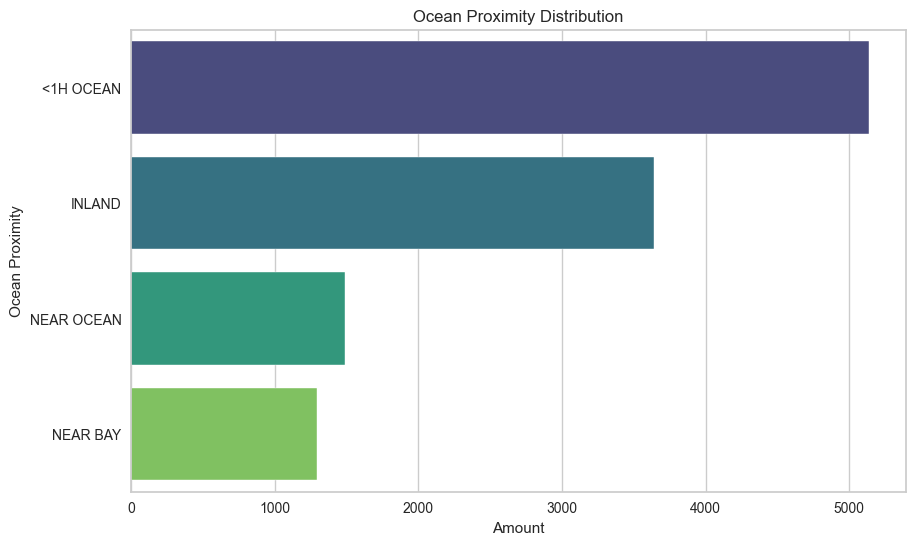

In [296]:
# Calculate the frequency of each ocean proximity category
ocean_proximity_counts = df['ocean_proximity'].value_counts()

# Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") # Set the grid background to white

# Create a horizontal bar plot
sns.barplot(x=ocean_proximity_counts.values, y=ocean_proximity_counts.index, palette="viridis")

# Add labels to the axes
plt.xlabel("Amount")
plt.ylabel("Ocean Proximity")

# Add title
plt.title("Ocean Proximity Distribution")

# Show plot
plt.show()

The majority of house data in the dataset are houses located in areas with a distance to the sea of less than one hour (<1H OCEAN) and houses located inland (INLAND).

**Location**

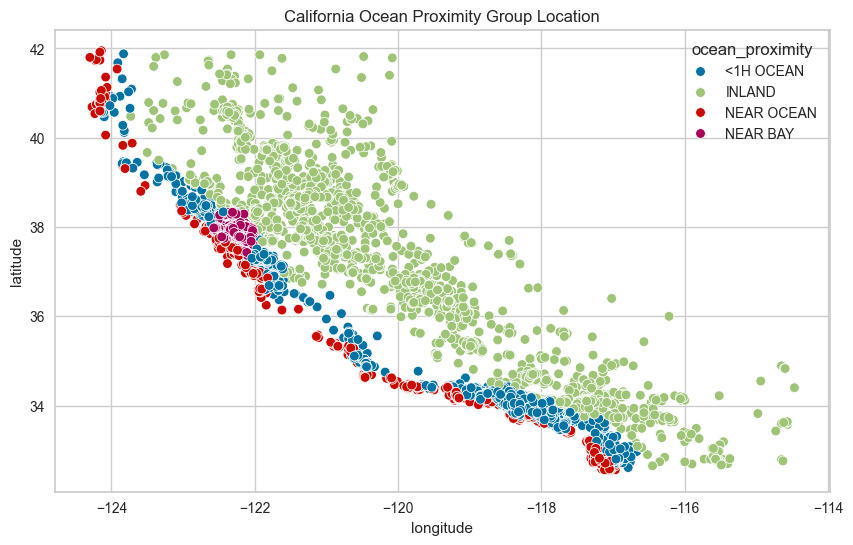

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity')
plt.title('California Ocean Proximity Group Location')
plt.show()


The distribution of house locations in California in the dataset is depicted in the map above based on 'ocean_proximity'. It can be seen that the majority of houses are in the INLAND area.

**Statement that the dataset is capable of being used to answer problems**

- This dataset has prepared comprehensive information relevant for home value predictive regression projects.

- The presence of missing values in total_bedrooms requires handling, but does not hinder analysis capabilities.

- This data is capable of being used to answer home value issues, with the caveat that additional data cleaning and preparation may be required before modeling.

## **Exploratory Data Analysis**

**Data distribution**

In [213]:
from tabulate import tabulate
from scipy import stats

results = []
# Loop trough these numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    column_data = df[col]
    
    # Anderson-Darling test 
    ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(column_data, dist='norm')
    
    result = 'Not Normal distribution' if ad_statistic > ad_critical_values[2] else 'Normal Distribution'

    results.append([col, ad_statistic, ad_critical_values, ad_significance_levels, result])


headers = ['column', 'ad_statistic', 'critical values', 'significance level', 'result']
table = tabulate(results, headers=headers, tablefmt='pretty')
print(table)
print("For the numerical category it's proven as not normal distribution")

+--------------------+--------------------+---------------------------------+----------------------------+-------------------------+
|       column       |    ad_statistic    |         critical values         |     significance level     |         result          |
+--------------------+--------------------+---------------------------------+----------------------------+-------------------------+
|     longitude      | 553.9701455905015  | [0.576 0.656 0.787 0.918 1.092] | [15.  10.   5.   2.5  1. ] | Not Normal distribution |
|      latitude      | 678.3319067880766  | [0.576 0.656 0.787 0.918 1.092] | [15.  10.   5.   2.5  1. ] | Not Normal distribution |
| housing_median_age | 48.29255882281359  | [0.576 0.656 0.787 0.918 1.092] | [15.  10.   5.   2.5  1. ] | Not Normal distribution |
|    total_rooms     | 698.8189155752807  | [0.576 0.656 0.787 0.918 1.092] | [15.  10.   5.   2.5  1. ] | Not Normal distribution |
|   total_bedrooms   |        nan         | [0.576 0.656 0.787 0.918 

**Distribution of Numeric Column data**

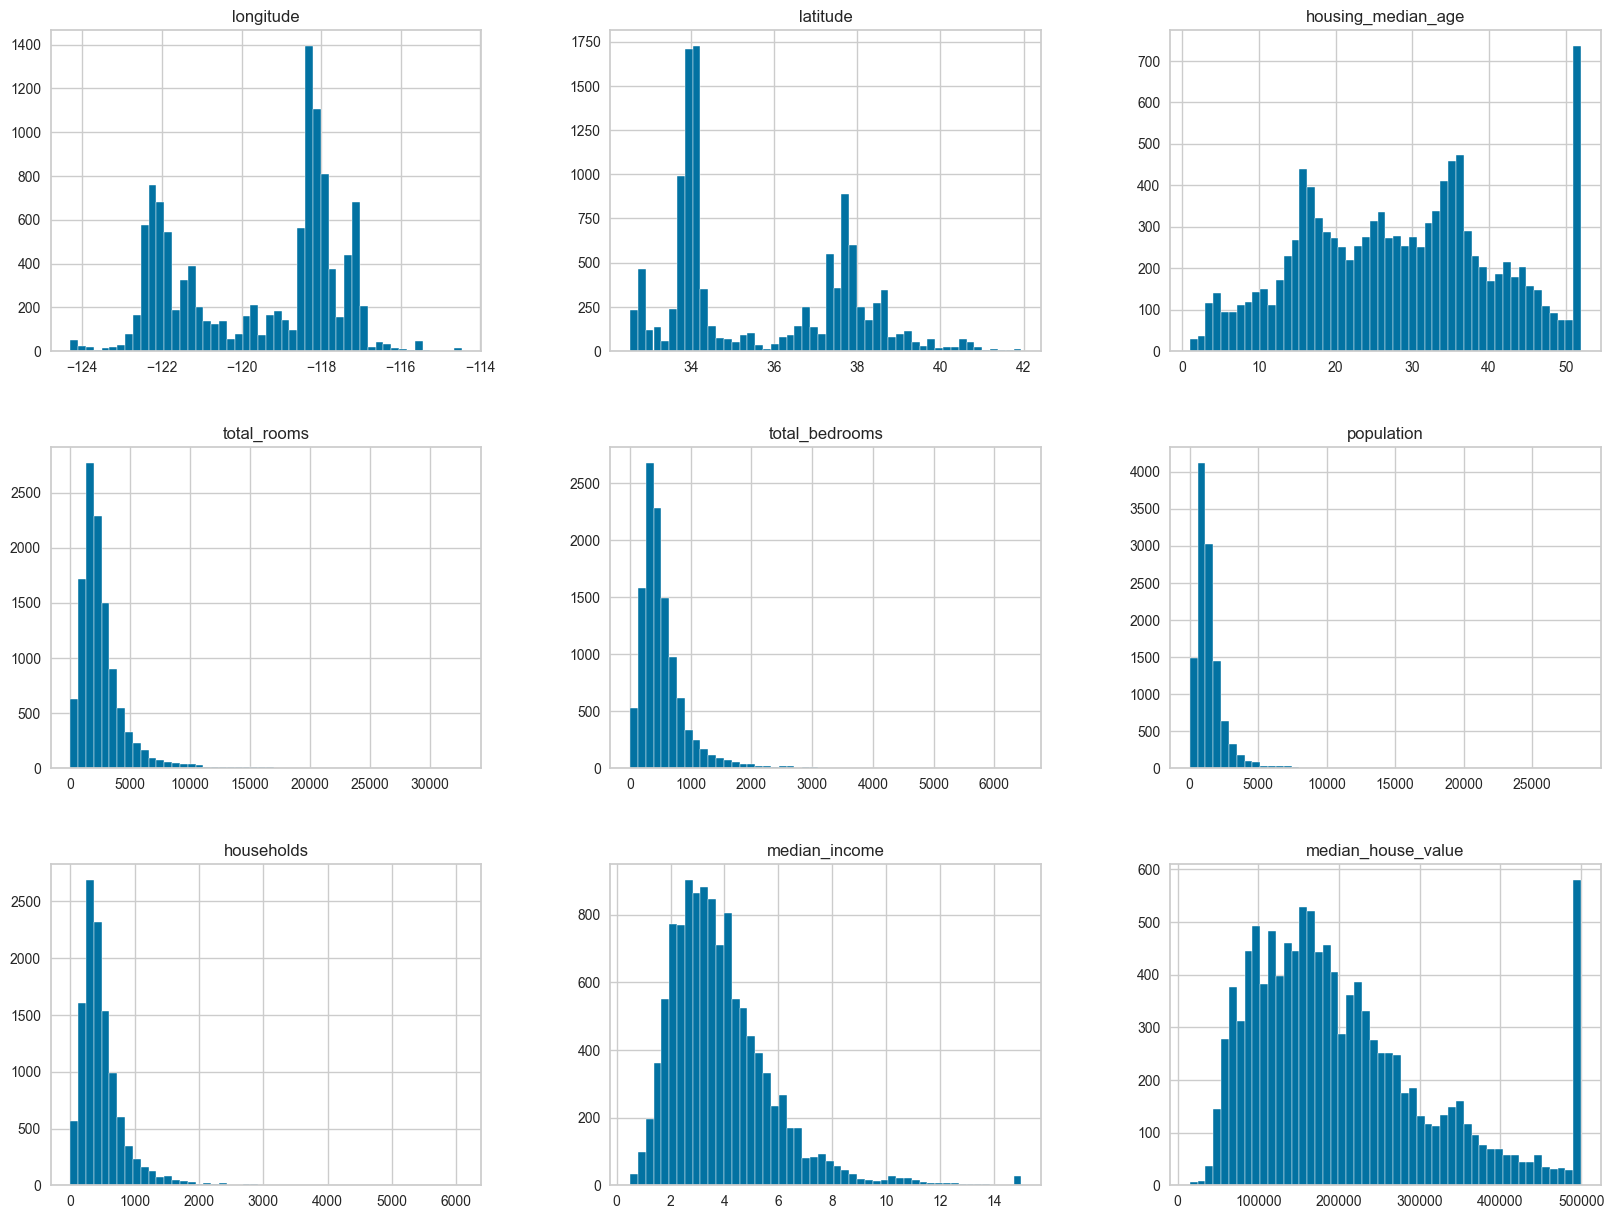

In [297]:
# Hisogram numerikal variabel

df.hist(bins=50, figsize=(20,15));

Based on the histogram above, it can be seen that none of the numeric columns have a normal or bell-shaped distribution. The majority of data has a 'right-skewed distribution', namely in the columns 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', and 'median_house_value'. In other words, there is positive skewness in these features. Apart from that, there are also many outliers in the values around 50 in housing_median_age and around 500000 in the median_house_value column.

**The next step is to find out the correlation between the variables in the dataset**

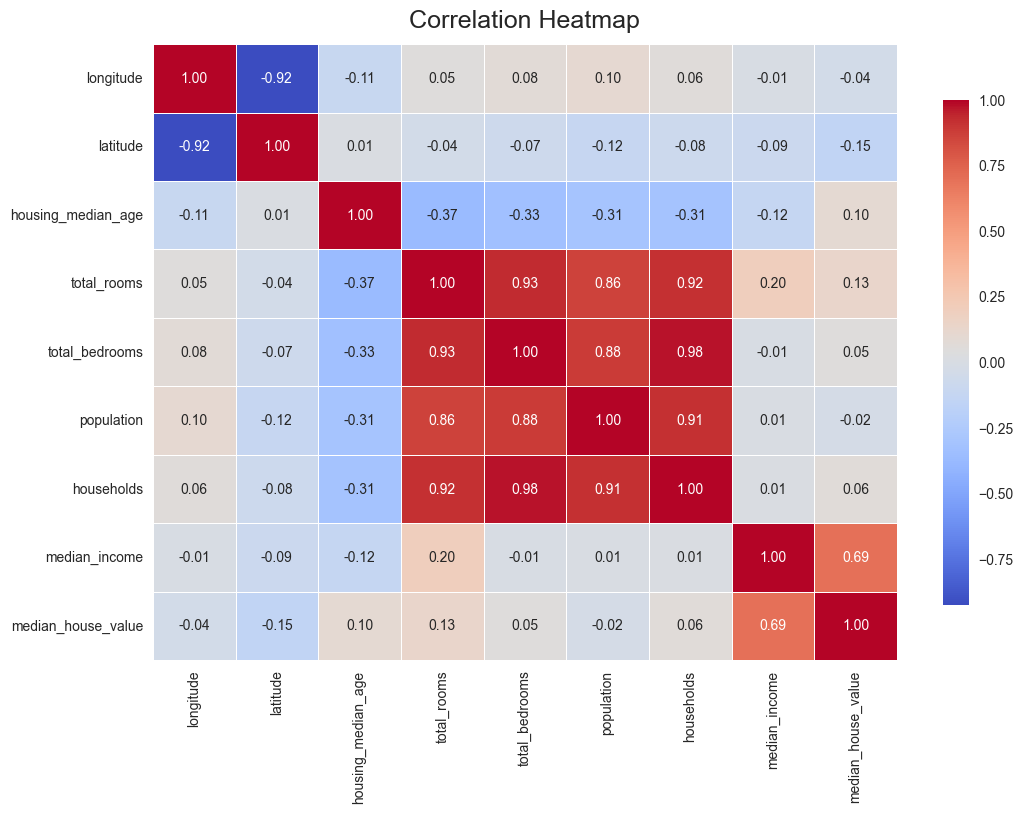

In [215]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# For a clearer heatmap, let's increase the size, adjust the color, and make the annotations stand out more.
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, cbar_kws={"shrink": .82}, annot_kws={"size": 10}, linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.show()


The correlation heatmap above shows the relationship between variables in the dataset:

- Strong Positive Correlation: There is a significant positive correlation between total_rooms, total_bedrooms, population, and households. This suggests that group blocks with more rooms tend to have more bedrooms, residents, and households, which makes sense because these variables are related to the size of the group block.

- Correlation with Target: median_income has a strong positive correlation (0.69) with median_house_value, indicating that areas with higher median incomes tend to have higher home values. This is an important insight for predictive models of home value.

- Negative Correlation: There is a negative correlation between latitude and longitude and median_house_value, although it is not very strong. This could indicate a geographic trend in home values in California.

**Bivariate Analysis**

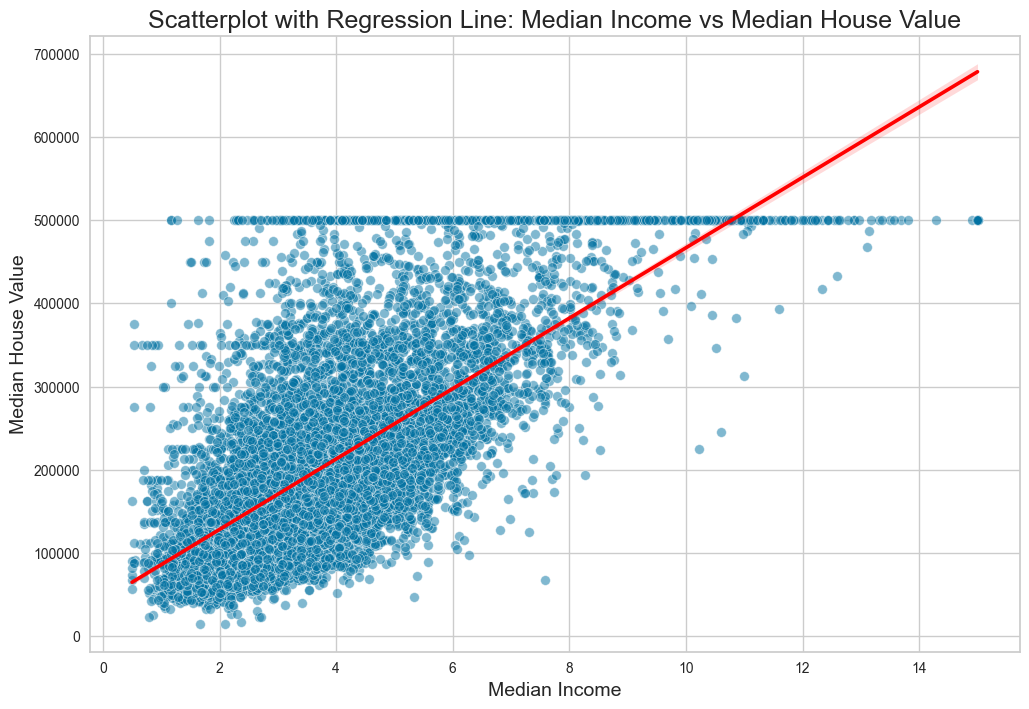

In [298]:
# Replace 'df' with the actual name of your DataFrame variable
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.5)
sns.regplot(data=df, x='median_income', y='median_house_value', scatter=False, color='red')
scatterplot.set_title('Scatterplot with Regression Line: Median Income vs Median House Value', fontsize=18)
scatterplot.set_xlabel('Median Income', fontsize=14)
scatterplot.set_ylabel('Median House Value', fontsize=14)

plt.show()

Scatter plot between median_income and median_house_value :

1. Positive Relationship: There is a clear positive relationship between median income and median home value, with increasing income generally associated with increasing home value. This confirms the correlation we saw in the previous heatmap.

2. Linear Improvement: The relationship between these two variables appears to be linear, indicating that a linear regression model could be a good approach to predicting home value based on income.

3. Cap on Home Value: There is a horizontal line that shows a cap on median home value at a given income level. This could indicate a price limit set for affordable homes or the effect of a maximum allowable home value limit in the dataset.
Outliers: Some outliers are visible, especially in homes with high median values regardless of median income. This may indicate other factors affecting home value besides income.

## **Data Preparation**

Data cleaning will be carried out on a copy of the dataframe, namely df_model which will later be used in model testing.

There are several things that can be done in data preprocessing, namely:

     1. Missing value
     2. Duplicated values
     3. Outliers
     4. Data types
     5. Column name
     6. Rare labels, Cardinaliy, Collinearty 

In [300]:
# Create a duplicate dataframe

df_model = df.copy()

In [303]:
# Check more detailed info for each feature

listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc



,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,782,"[-118.41, -121.59, -117.26, -117.04, -119.76, ..."
1,latitude,float64,0,0.00,808,"[34.0, 39.78, 32.98, 32.77, 36.77, 37.72, 39.4..."
2,housing_median_age,float64,0,0.00,52,"[30.0, 18.0, 12.0, 16.0, 36.0, 46.0, 17.0, 44...."
3,total_rooms,float64,0,0.00,4770,"[3550.0, 945.0, 3900.0, 7963.0, 2507.0, 1836.0..."
4,total_bedrooms,float64,110,0.95,1647,"[934.0, 205.0, 977.0, 1881.0, 466.0, 319.0, 28..."
5,population,float64,0,0.00,3233,"[3738.0, 385.0, 1690.0, 3769.0, 1227.0, 767.0,..."
6,households,float64,0,0.00,1543,"[880.0, 207.0, 892.0, 1804.0, 474.0, 302.0, 64..."
7,median_income,float64,0,0.00,8180,"[3.191, 2.1838, 4.125, 2.9624, 2.785, 5.9114, ..."
8,ocean_proximity,object,0,0.00,4,"[<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY]"
9,median_house_value,float64,0,0.00,3340,"[271200.0, 58000.0, 226900.0, 144700.0, 72300...."


1. **Missing Value**

In [304]:
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        110
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

You can see that there are 110 missing values out of rows in the 'total_bedrooms' column (~0.95% of the total data). It can be assumed that the number of missing values is not very significant, so it can be ignored or you can drop the missing values.

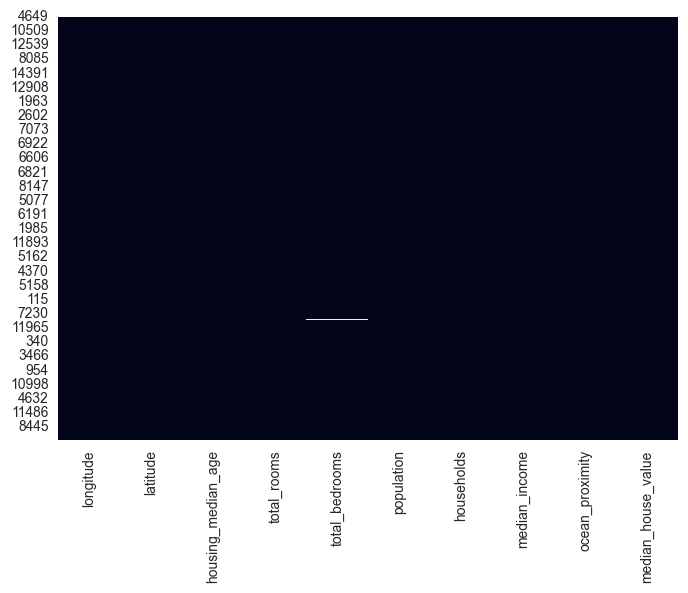

In [305]:
# Missing value heatmap

sns.heatmap(df_model.isnull(), cbar=False);

In [306]:
# Drop missing value

df_model.dropna(axis='rows', inplace=True)

In [307]:
# Cek kembali dataset info

df_model.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

110 missing values have been dropped so that there are no more missing values

2. **Duplicated Value**

In [308]:
# Cek data duplikat

df_model.duplicated().sum()

0

There are no duplicates in this dataset

3. **Outlier**

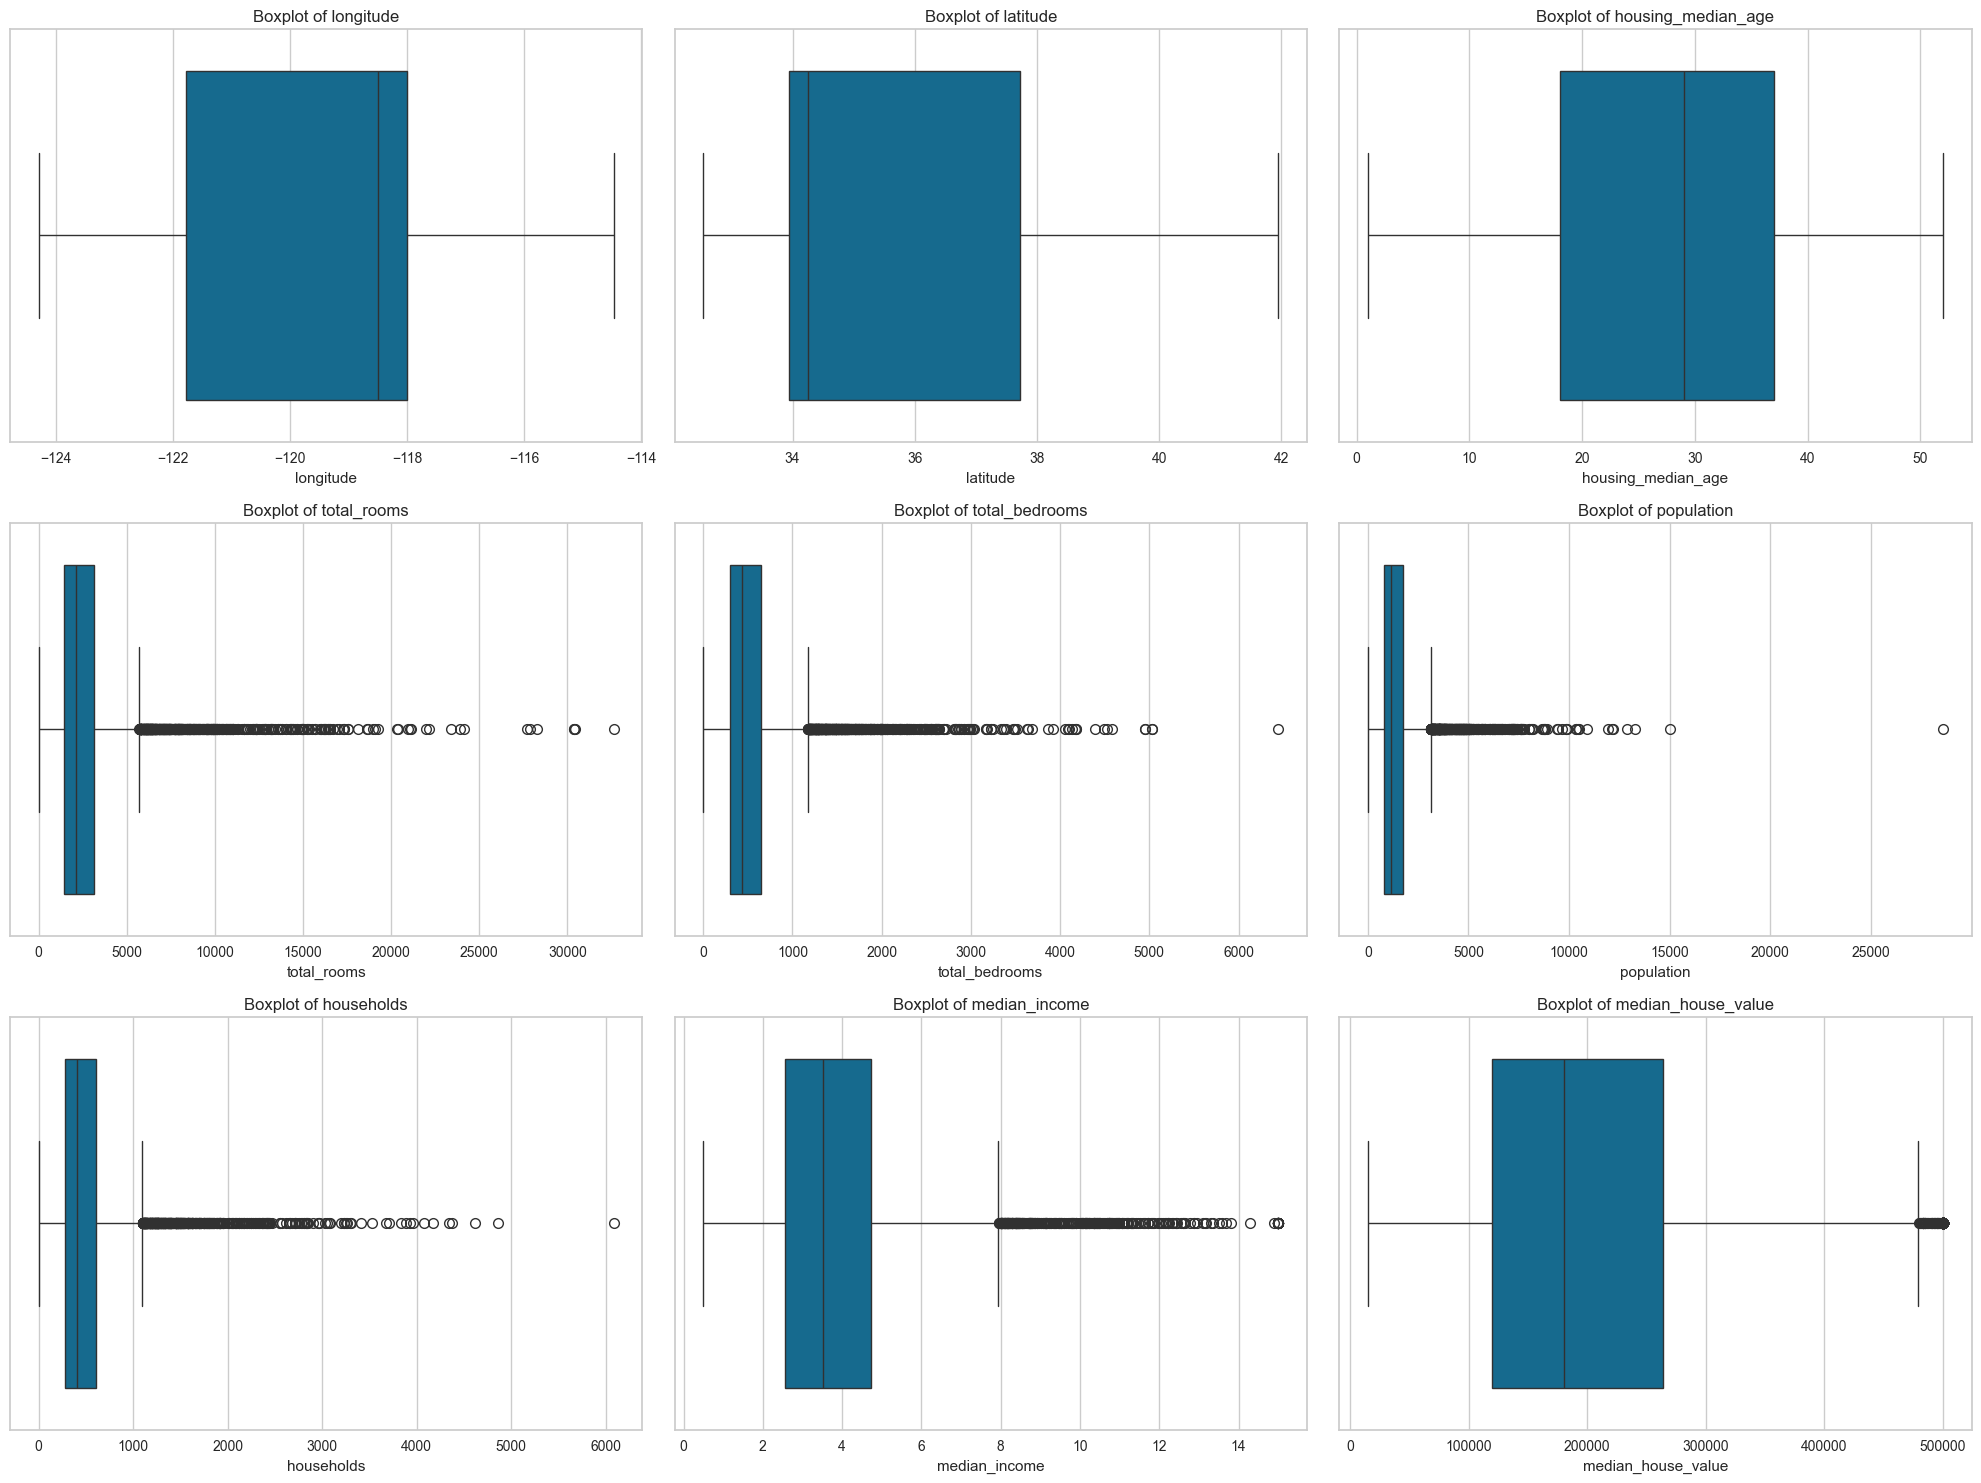

In [309]:
# Identifying numerical columns
original_numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for the subplots
n_rows = int(np.ceil(len(original_numerical_columns) / 3))

# Plotting boxplots for numerical columns to visualize outliers
plt.figure(figsize=(20, n_rows * 5))  # Adjusting figure size based on the number of rows

# Creating a boxplot for each numerical column
for i, col in enumerate(original_numerical_columns):
    plt.subplot(n_rows, 3, i + 1)  # Adjusting the grid size based on the number of numerical columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjusting subplot params for a nice fit
plt.show()

From the plot above, it can be concluded that there are many outliers in several features. To make this dataset clean from outliers, here I use the Winsorize method IQR

**Handling Outlier**

In [310]:
# make function for handling outlier

def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

First, look for strange values in the data using the IQR method. Then, refine the numerical features in the data. After that, check whether there are values that are too large or abnormal, if there are, we consider deleting them based on knowledge of the domain knowledge. The goal is that the data used to create the model is not affected by extreme values

- **Median House Value**

In [311]:
# Cek deskriptif statistik coloumn median_house_value

df_model['median_house_value'].describe()

count     11448.000000
mean     207011.996331
std      115333.220146
min       14999.000000
25%      119600.000000
50%      180400.000000
75%      263600.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [312]:
# Outliers pada fitur median_house_value

find_anomalies(df_model['median_house_value'])

IQR: 144000.0
limit_bawah: -96400.0
limit_atas: 479600.0


In [313]:
# Cek median_house_value > USD 480275

df_model[df_model['median_house_value'] > 430937.5].count()['median_house_value']

806

The Interquartile Range (IQR) is calculated at USD 143,950. Based on the IQR method, the lower limit is USD -96,100 (which is unrealistic in this context and can be ignored) and the upper limit is USD 479,700. There are 806 records that have a 'median_house_value' value above this upper limit, USD 479,700.

The distribution of 'median_house_value' values shows skew to the right, which means the distribution has a long tail on the right side. Most data is below USD 263,775, but there are some very high values up to USD 500,001. Data with a 'median_house_value' value above USD 479,700 is considered an outlier based on the IQR method. Excluding this data in modeling will help make the distribution more symmetrical, but keep in mind that this results in restrictions in the model to be built, as it does not take into account properties with such high values

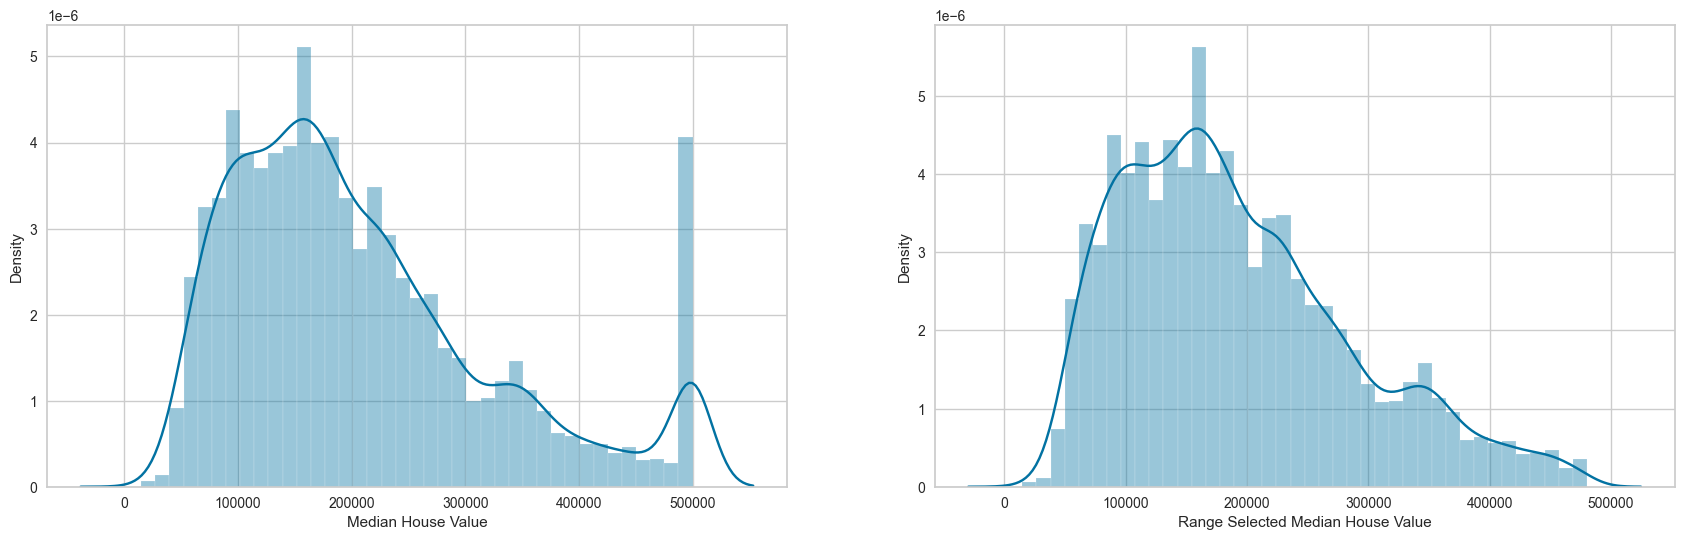

In [314]:
# Perform filtering on data

df_model = df_model[(df_model['median_house_value'] <= 480275)]

# Plot the data distribution before and after filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('Median House Value')
axes[1].set_xlabel('Range Selected Median House Value');

In [315]:
# Check descriptive statistics of the median_house_value column after filtering

df_model['median_house_value'].describe()

count     10845.000000
mean     190774.624066
std       95051.738440
min       14999.000000
25%      116300.000000
50%      173500.000000
75%      245800.000000
max      480100.000000
Name: median_house_value, dtype: float64

- **Median Income**

In [316]:
# Cek deskriptif statistik kolom median_income

df_model['median_income'].describe()

count    10845.000000
mean         3.651030
std          1.539029
min          0.499900
25%          2.517900
50%          3.437500
75%          4.552600
max         13.110700
Name: median_income, dtype: float64

In [317]:
# Outliers pada fitur median_income

find_anomalies(df_model['median_income'])

IQR: 2.0347
limit_bawah: -0.5341499999999999
limit_atas: 7.6046499999999995


In [318]:
# Cek median_income > USD 7.6049

df_model[df_model['median_income'] > 7.6049].count()['median_income']

185

The Interquartile Range (IQR) was calculated as 2.0308. Based on the IQR method, the lower limit is found to be USD -0.534 (this negative value is unrealistic and can be ignored in this context) and the upper limit is USD 7.5962. There are 185 data that have a 'median_income' value above this upper limit.

The distribution of 'median_income' values shows a skew to the right (positive skewness), which means the distribution has an elongated tail on the right side. Most of the data (75%) has a 'median_income' value below USD 4.55, but there are some very high values up to USD 13.1107. Data with a 'median_income' value above USD 7.5962 is considered an outlier based on the IQR method. Excluding this data in modeling will help reduce skewness in the distribution, but it will be a limitation in the model to be built, as it does not take into account such very high income values.

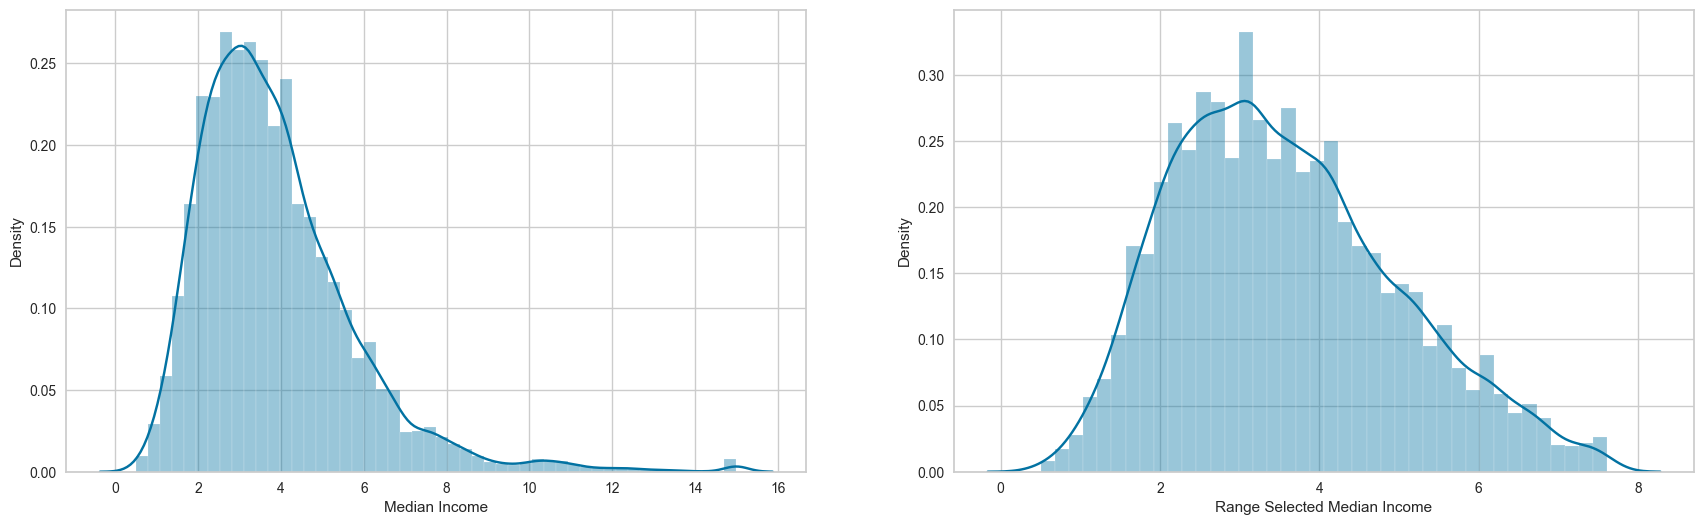

In [319]:
# Melakukan filtering pada data

df_model = df_model[(df_model['median_income'] <= 7.619675)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('Median Income')
axes[1].set_xlabel('Range Selected Median Income');

In [320]:
# Cek deskriptif statistik kolom median_income setelah filtering

df_model['median_income'].describe()

count    10664.000000
mean         3.569420
std          1.412310
min          0.499900
25%          2.503225
50%          3.398050
75%          4.482100
max          7.618000
Name: median_income, dtype: float64

- **Total Rooms**

In [321]:
# Cek deskriptif statistik kolom total_rooms

df_model['total_rooms'].describe()

count    10664.000000
mean      2602.536853
std       2143.857617
min          2.000000
25%       1433.000000
50%       2101.000000
75%       3110.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [322]:
# Outliers pada fitur total_rooms

find_anomalies(df_model['total_rooms'])

IQR: 1677.0
limit_bawah: -1082.5
limit_atas: 5625.5


In [323]:
# Cek total_rooms > 5625.0 rooms

df_model[df_model['total_rooms'] > 5625.0].count()['total_rooms']

653

IQR is calculated as 1,680 rooms. Based on the IQR method, the lower limit is obtained as -1.082 rooms (this negative value is unrealistic and can be ignored in this context) and the upper limit as 5.633 rooms. There are 653 records that have a 'total_rooms' value above the upper limit of 5,633 rooms.

The 'total_rooms' distribution shows some very high values, reaching 32,627 rooms, which causes the distribution to have a long tail on the right side (positive skewness). Data with a 'total_rooms' value above 5,633 rooms is considered an outlier based on the IQR method. Excluding or modifying these values in modeling will help reduce skewness in the distribution, but this will be a limitation in the model to be built, as it does not consider such a large number of rooms.

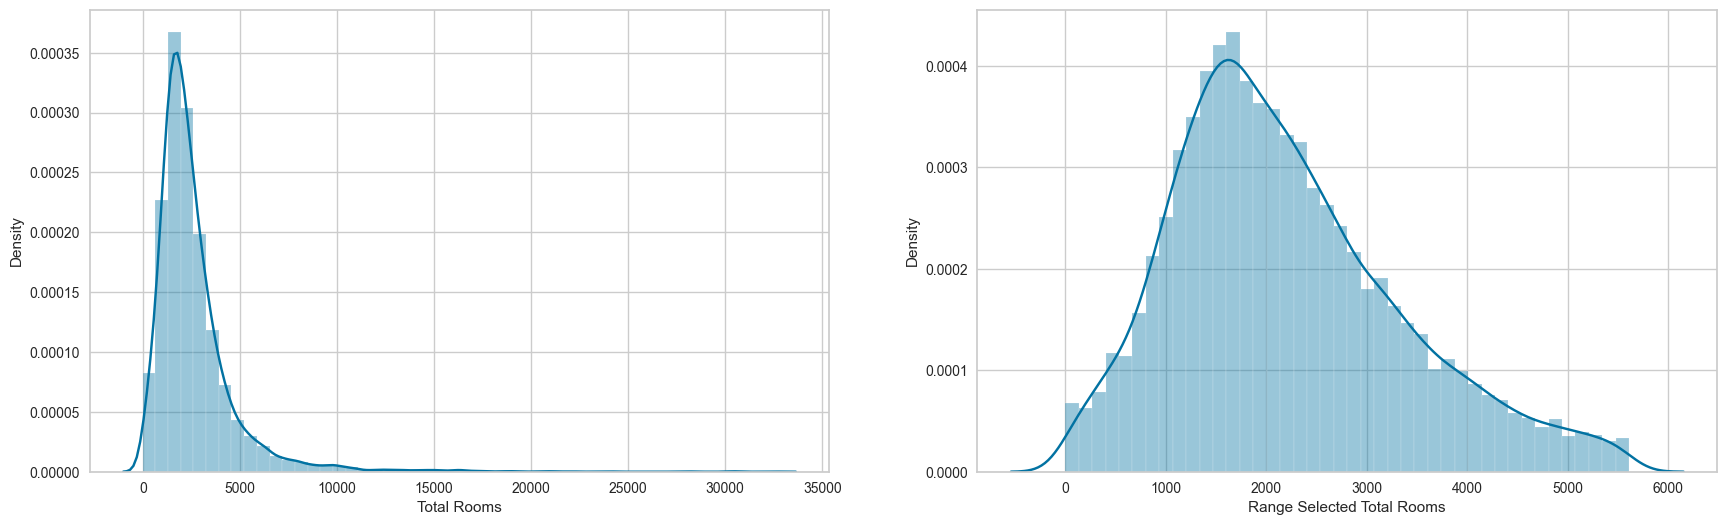

In [324]:
# Melakukan filtering pada data

df_model = df_model[(df_model['total_rooms'] <= 5620)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['total_rooms'], ax=axes[0])
sns.distplot(df_model['total_rooms'], ax=axes[1])
axes[0].set_xlabel('Total Rooms')
axes[1].set_xlabel('Range Selected Total Rooms');

In [325]:
# Cek deskriptif statistik kolom total_rooms setelah filtering

df_model['total_rooms'].describe()

count    10007.000000
mean      2198.612072
std       1137.405504
min          2.000000
25%       1391.000000
50%       2012.000000
75%       2855.500000
max       5613.000000
Name: total_rooms, dtype: float64

- **Households**

In [326]:
# Cek deskriptif statistik kolom households

df_model['households'].describe()

count    10007.000000
mean       434.957830
std        233.193068
min          2.000000
25%        273.000000
50%        396.000000
75%        560.000000
max       2374.000000
Name: households, dtype: float64

In [327]:
# Outliers pada fitur households

find_anomalies(df_model['households'])

IQR: 287.0
limit_bawah: -157.5
limit_atas: 990.5


In [243]:
# Cek households > 990.5

df_model[df_model['households'] > 990.5].count()['households']

243

IQR calculated as 287.5 households. Based on the IQR method, the lower limit is obtained as -158.25 households (this negative value is unrealistic and can be ignored in this context) and the upper limit as 991.75 households. There are 243 data that have a 'households' value above the upper limit of 991.75 households.

The 'households' distribution shows some very high values, reaching 2,374 households, which causes the distribution to have a long tail on the right side (positive skewness). Data with a 'households' value above 991.75 households is considered an outlier based on the IQR method. Excluding or modifying these values in modeling will help reduce skewness in the distribution, but this will be a limitation in the model to be built, as it does not take into account such a large number of households.

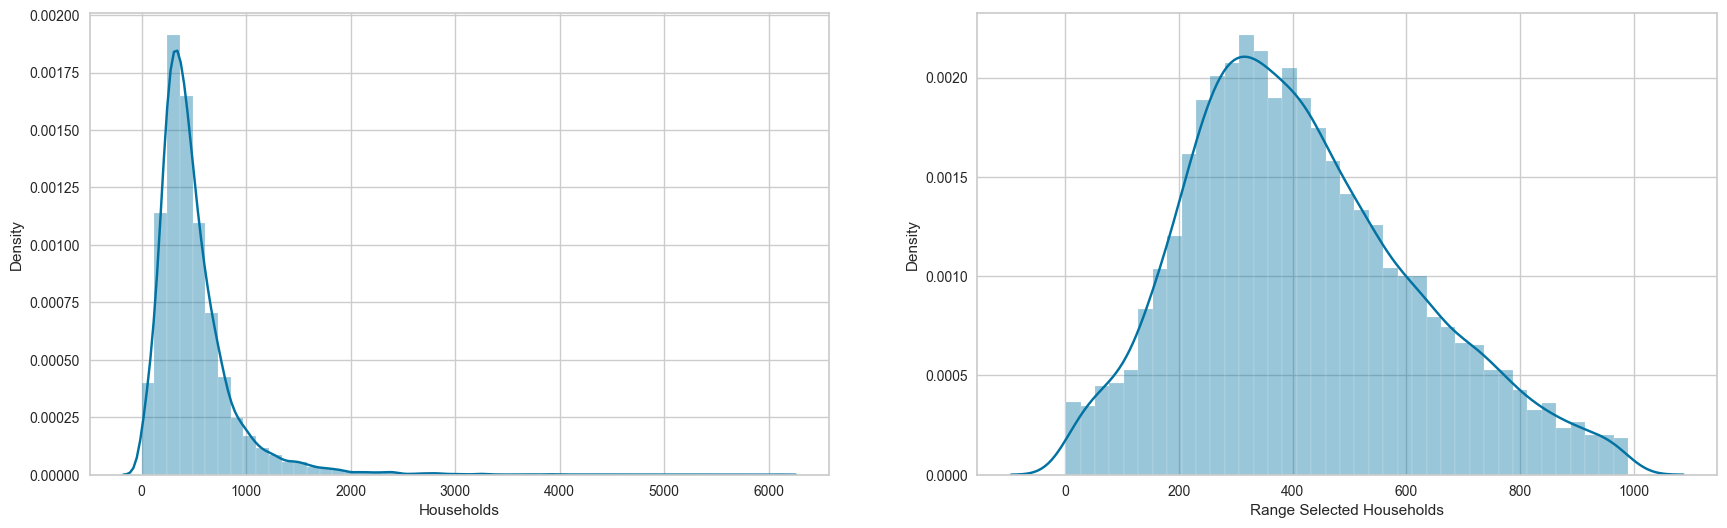

In [328]:
# Melakukan filtering pada data

df_model = df_model[(df_model['households'] <= 990.5)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['households'], ax=axes[0])
sns.distplot(df_model['households'], ax=axes[1])
axes[0].set_xlabel('Households')
axes[1].set_xlabel('Range Selected Households');

In [329]:
# Cek deskriptif statistik kolom households setelah filtering

df_model['households'].describe()

count    9764.000000
mean      416.815649
std       203.169252
min         2.000000
25%       270.000000
50%       389.000000
75%       543.000000
max       990.000000
Name: households, dtype: float64

- **Total Bedrooms**

In [330]:
# Cek deskriptif statistik kolom total_bedrooms

df_model['total_bedrooms'].describe()

count    9764.000000
mean      446.277448
std       219.951148
min         2.000000
25%       287.000000
50%       414.000000
75%       583.000000
max      1371.000000
Name: total_bedrooms, dtype: float64

In [331]:
# Outliers pada fitur total_bedrooms

find_anomalies(df_model['total_bedrooms'])

IQR: 296.0
limit_bawah: -157.0
limit_atas: 1027.0


In [332]:
# Cek total_bedrooms > 1027

df_model[df_model['total_bedrooms'] > 1027].count()['total_bedrooms']

84

IQR is calculated as 295 bedrooms. Based on the IQR method, the lower limit is obtained as -157.0 bedrooms (this negative value is unrealistic and can be ignored in this context) and the upper limit as 1,024.5 bedrooms. There are 84 records that have a 'total_bedrooms' value above the upper limit of 1,024.5 bedrooms.

The 'total_bedrooms' distribution shows some very high values, reaching 1,371 bedrooms, which causes the distribution to have a long tail on the right side (positive skewness). Data with a 'total_bedrooms' value above 1,024.5 bedrooms is considered an outlier based on the IQR method. Excluding or modifying these values in modeling will help reduce skewness in the distribution, but this will be a limitation in the model to be built, as it does not take into account such a large number of bedrooms.

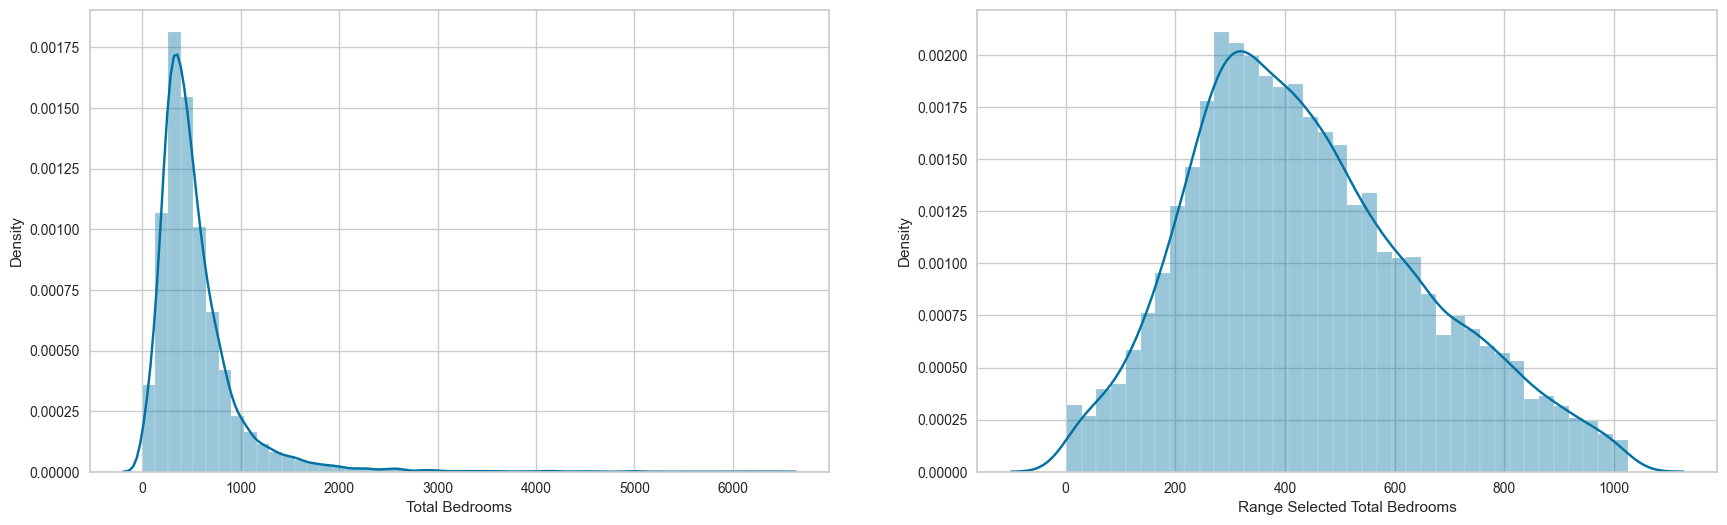

In [333]:
# Melakukan filtering pada data

df_model = df_model[(df_model['total_bedrooms'] <= 1025)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['total_bedrooms'], ax=axes[0])
sns.distplot(df_model['total_bedrooms'], ax=axes[1])
axes[0].set_xlabel('Total Bedrooms')
axes[1].set_xlabel('Range Selected Total Bedrooms');

In [250]:
# Cek deskriptif statistik kolom total_bedrooms setelah filtering

df_model['total_bedrooms'].describe()

count    9676.000000
mean      440.517673
std       212.375561
min         2.000000
25%       285.000000
50%       411.000000
75%       577.000000
max      1025.000000
Name: total_bedrooms, dtype: float64

- **Population**

In [334]:
# Cek deskriptif statistik kolom population

df_model['population'].describe()

count    9676.000000
mean     1206.601902
std       642.667126
min         3.000000
25%       766.000000
50%      1110.000000
75%      1555.000000
max      8733.000000
Name: population, dtype: float64

In [335]:
# Outliers pada fitur population

find_anomalies(df_model['population'])

IQR: 789.0
limit_bawah: -417.5
limit_atas: 2738.5


In [336]:
# Cek population > 2737

df_model[df_model['population'] > 2737].count()['population']

222

The IQR was calculated as 788.75 people. Based on the IQR method, the lower limit is obtained as -417,125 people (this negative value is unrealistic and can be ignored in this context) and the upper limit as 2,737,875 people. There are 222 data points that have a 'population' value above the upper limit of 2,737,875 people.

The 'population' distribution shows some very high values, reaching 8,733 people, which causes the distribution to have a long tail on the right side (positive skewness). Data with a 'population' value above 2,737,875 people is considered an outlier based on the IQR method. Excluding or modifying these values in modeling will help reduce skewness in the distribution, but this will be a limitation in the model to be built, as it does not take into account such a large population.

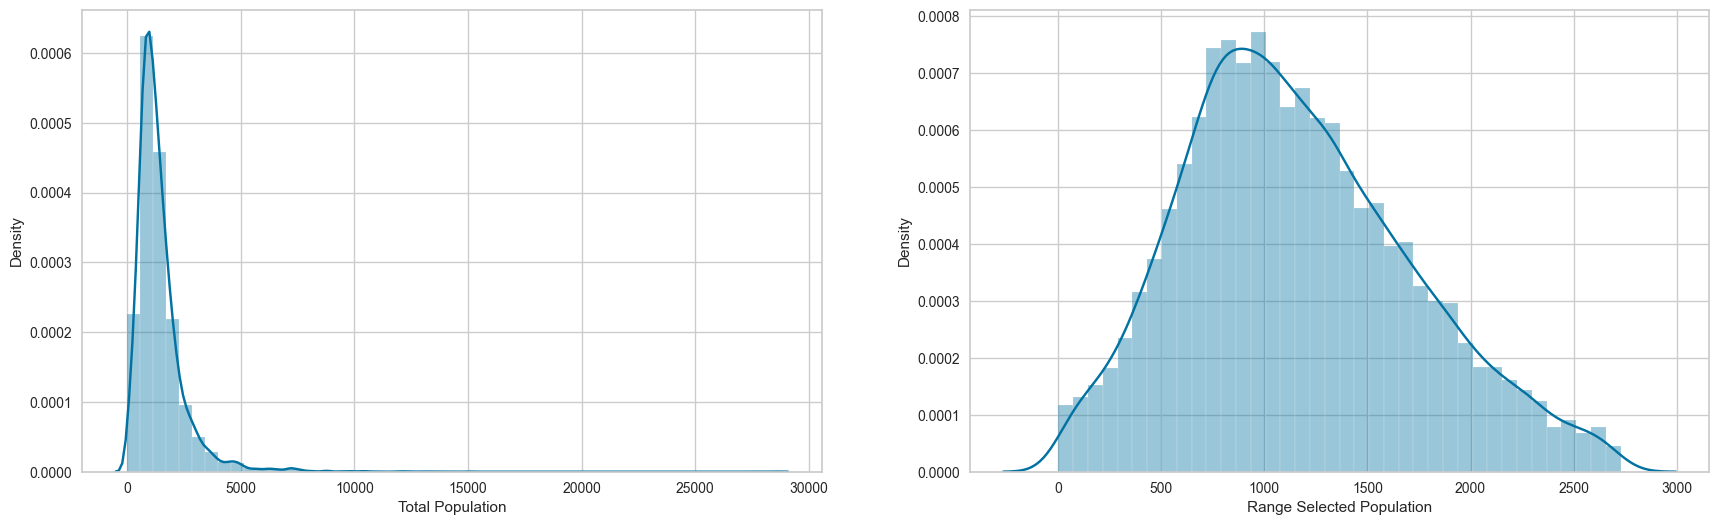

In [337]:
# Melakukan filtering pada data

df_model = df_model[(df_model['population'] <= 2728)]

# Plot distribusi data sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['population'], ax=axes[0])
sns.distplot(df_model['population'], ax=axes[1])
axes[0].set_xlabel('Total Population')
axes[1].set_xlabel('Range Selected Population');

In [338]:
# Cek deskriptif statistik kolom population setelah filtering

df_model['population'].describe()

count    9451.000000
mean     1158.075865
std       556.224013
min         3.000000
25%       758.000000
50%      1092.000000
75%      1520.000000
max      2727.000000
Name: population, dtype: float64

4. **Column Name**

In [342]:

# Cek name coloumn for whitespace
print("median_house_value:", df.columns.tolist())

# Change space with underscores in name coloumn
df.columns = df.columns.str.replace(' ', '_')

# Verified the coloumn
print("median_house_value:", df.columns.tolist())


median_house_value: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']
median_house_value: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']


5. **Clean Dataset**

In [343]:
# Cek dataset clean
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7743,-121.59,39.78,18.0,945.0,205.0,385.0,207.0,2.1838,INLAND,58000.0
2238,-117.26,32.98,12.0,3900.0,977.0,1690.0,892.0,4.1250,NEAR OCEAN,226900.0
10360,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND,72300.0
3978,-122.47,37.72,46.0,1836.0,319.0,767.0,302.0,5.9114,NEAR OCEAN,399000.0
8773,-120.09,39.40,17.0,1076.0,283.0,171.0,64.0,2.1250,INLAND,83900.0


In [344]:
# Cek back info dataset

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9451 entries, 7743 to 7270
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9451 non-null   float64
 1   latitude            9451 non-null   float64
 2   housing_median_age  9451 non-null   float64
 3   total_rooms         9451 non-null   float64
 4   total_bedrooms      9451 non-null   float64
 5   population          9451 non-null   float64
 6   households          9451 non-null   float64
 7   median_income       9451 non-null   float64
 8   ocean_proximity     9451 non-null   object 
 9   median_house_value  9451 non-null   float64
dtypes: float64(9), object(1)
memory usage: 812.2+ KB


In [259]:
# Data rows that are eliminated based on outliers

1 - 9450/1158

-7.160621761658032

As many as 7% of the outlie data have been actioned using the IQR method. Of course, this will be a limitation of the model where the model will only predict more optimally on data within the IQR range that has been determined.

**Rare Labels**, **Cardinality** ,**Collineartiy**




In [260]:
# For Rare Labels, we will count the frequency of each label in the 'ocean_proximity' column
rare_labels = df_model['ocean_proximity'].value_counts(normalize=True)
print("Rare Labels in 'ocean_proximity':")
print(rare_labels[rare_labels < 0.01]) 

# For Cardinality, we only need to count the number of unique labels in the 'ocean_proximity' column
cardinality = df_model['ocean_proximity'].nunique()
print(f"\nCardinality of 'ocean_proximity': {cardinality} unique labels")

# For Collinearity, we will calculate and display the correlation between 'total_bedrooms' and 'households'
collinearity = df_model[['total_bedrooms', 'households']].corr()
print("\nCollinearity between 'total_bedrooms' and 'households':")
print(collinearity)


Rare Labels in 'ocean_proximity':
Series([], Name: ocean_proximity, dtype: float64)

Cardinality of 'ocean_proximity': 4 unique labels

Collinearity between 'total_bedrooms' and 'households':
                total_bedrooms  households
total_bedrooms         1.00000     0.96994
households             0.96994     1.00000


- Rare Labels
Kita menemukan bahwa label "ISLAND" dalam kolom ocean_proximity muncul dengan frekuensi yang sangat rendah (kurang dari 0.01 atau 1% dari total data). Ini berarti "ISLAND" adalah label yang langka.

- Cardinality
Kolom ocean_proximity memiliki 5 label unik. Kardinalitas ini merujuk pada jumlah nilai berbeda yang ada dalam kolom kategorikal.

- Collinearity
Korelasi antara total_bedrooms dan households sangat tinggi, dengan koefisien sebesar 0.978561. Nilai korelasi yang mendekati 1 ini menunjukkan adanya kolinearitas yang kuat antara kedua kolom tersebut, yang berarti bahwa informasi yang dikandung oleh satu kolom sangat serupa dengan informasi yang dikandung oleh kolom lainnya.

## **Feature Engineering**

In [345]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

**Data Split**

In [346]:

# Split data
seen, unseen = train_test_split(df_model, test_size=0.2, random_state=42)


In [347]:

# Memisahkan fitur dan target
X = seen.drop('median_house_value', axis=1)
y = seen['median_house_value']

# Split data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menunjukan shape masing masing dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6048, 9), (1512, 9), (6048,), (1512,))

**Encoding**

Encoding is a method that can be applied to represent categorical variables into numerical ones in machine learning. As for this project, I used OneHot encoding. I use onehot encoding for nominal categorical features because these features do not have many unique values and do not have levels for each value.

- Onehot : `median_house_value`
- Pass through

I will use ColumnTransformer to encode these features which will then be applied using Pipeline modeling.

**Scaling**

In [348]:
# Define scaler
Robust = RobustScaler()

- Outlier-Resistant: RobustScaler uses median and interquartile range (IQR), which makes it outlier-resistant. This is especially important in housing data where outliers such as luxury homes or unusual market conditions can distort the scale of the data.
- Improved Model Performance: Many machine learning algorithms, especially scale-sensitive ones like SVM or k-NN, perform better when all features are at a similar scale. RobustScaler helps in normalizing data without losing information from the data range, which can improve the overall accuracy and performance of the model.

In [265]:
# test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Adjusted code setup based on the provided dataset

# Numeric features
numeric_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',]

# Categorical features
categorical_features = ['ocean_proximity']

# Preprocessor for numeric and categorical features
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numeric_features),
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

# Pipeline for feature engineering
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Main pipeline with regression model
pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
   # ('regressor', RandomForestRegressor(n_estimators=100))
])

# Display the final pipeline structure
pipeline



Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   RobustScaler(),
                                                                   ['housing_median_age',
                                                                    'total_rooms',
                                                                    'total_bedrooms',
                                                                    'population',
                                                                    'households',
                                                                    'median_income']),
                                                                  ('One Hot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['ocean_proximity'])]))]))])

**Pipeline Overview**

The designed pipeline integrates preprocessing and model selection steps for a robust and flexible machine learning workflow tailored to predicting house prices in California.

**Preprocessing Data**
Utilizing a `ColumnTransformer`, the pipeline applies distinct scaling techniques to numerical and categorical features:

- **Numeric Features**: Numerical attributes such as 'housing_median_age', 'total_rooms', among others, are scaled using `RobustScaler`. This scaler is particularly useful in mitigating the impact of outliers.
- **Categorical Feature**: The 'ocean_proximity' feature is transformed using `OneHotEncoder`. This ensures that this categorical feature is effectively utilized within regression models.

**Feature Engineering Pipeline**
Incorporating the preprocessing steps into the pipeline ensures that data transformations are consistently applied during both training and prediction phases.

**Flexibility in Model Selection**
The pipeline is prepared to include a regression model, though a specific model is not yet determined. This offers the flexibility to test various regression models such as `RandomForestRegressor`, `KNeighborsRegressor`, `LinearRegression`, `DecisionTreeRegressor`, `XGBRegressor`, and the order.

**Business Insight**

- **Resistance to Outliers**: The use of `RobustScaler` indicates a cautious approach towards outliers, which are frequently found in housing data. This enhances the model's potential to yield accurate predictions, especially for standard-priced homes.
- **Categorical Feature Processing**: The `OneHotEncoder` for 'ocean_proximity' ensures that vital information from this categorical feature is preserved, which may be highly relevant in determining house prices.
- **Effective Model Validation**: The integration of the Pipeline with cross-validation techniques such as `RandomizedSearchCV` and `KFold` allows for efficient hyperparameter tuning and objective model evaluation.
- **Ease of Implementation and Reproducibility**: A well-structured pipeline ensures ease of implementation and enhances the reproducibility of results, which is crucial for the continuous and iterative development of models.
- **Comprehensive Model Evaluation**: Utilizing a variety of metrics such as `mean_squared_error`, `mean_absolute_error`, and `mean_absolute_percentage_error` provides a deep understanding of model performance from multiple perspectives, enabling a more holistic assessment of model efficacy.


## **Benchmark Model**

In [266]:
from pycaret.regression import *
from pycaret.regression import setup, create_model

setup(data=seen, target='median_house_value', preprocess=False, custom_pipeline=pipeline, session_id=123)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(7560, 10)"
4,Transformed data shape,"(7560, 13)"
5,Transformed train set shape,"(5292, 13)"
6,Transformed test set shape,"(2268, 13)"
7,Numeric features,8
8,Categorical features,1


In [267]:
top2_model=compare_models(n_select=2)

print(top2_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,30798.1495,2071259449.7161,45439.5357,0.7633,0.2451,0.1867,0.2610
rf,Random Forest Regressor,33330.0020,2380290086.2477,48735.5723,0.7281,0.2610,0.2044,0.3360
et,Extra Trees Regressor,35373.0576,2607857457.6112,51013.8680,0.7019,0.2712,0.2157,0.1610
gbr,Gradient Boosting Regressor,36114.5968,2620886659.2658,51126.7019,0.7008,0.2737,0.2199,0.1730
knn,K Neighbors Regressor,37139.3109,2927830502.4000,54039.9336,0.6657,0.2819,0.2193,0.0100
lar,Least Angle Regression,43412.9647,3425662650.4168,58472.3669,0.6085,0.3617,0.2757,0.0080
llar,Lasso Least Angle Regression,43412.7840,3425663174.7693,58472.3709,0.6085,0.3617,0.2757,0.0060
br,Bayesian Ridge,43409.2424,3425540244.9659,58471.5720,0.6085,0.3602,0.2756,0.0070
ridge,Ridge Regression,43411.2314,3425580757.5348,58471.7730,0.6085,0.3611,0.2757,0.0080
lasso,Lasso Regression,43412.8349,3425663647.6609,58472.3761,0.6085,0.3617,0.2757,0.0230


[LGBMRegressor(n_jobs=-1, random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123)]


An evaluation of various regression models for home price prediction in California revealed the three best performing models based on various metrics. Here are detailed insights for each model:

1. Light Gradient Boosting Machine (LightGBM)
- MAE: 31,963.8140 - Indicates that the average absolute error in predictions is approximately $31,963.
- MSE: 2,093,600,405.8276 - Suggests that predictions typically deviate from the actual value by a square root of about $2,093,600,406.
- RMSE: 45,716.6369 - This mean squared error tells us that the standard deviation of the model's predictions from the actual price is approximately $45,716.
- R²: 0.7977 - Indicates that approximately 79.77% of the variability in house prices can be explained by the model inputs.

LightGBM stands out for its high accuracy and goodness-of-fit, showing the lowest absolute and squared errors and the highest R-squared values. Its efficiency in training time and predictive accuracy make it a top choice for home price prediction.

2. Random Forest Regressors
- MAE: 33,522.8824 - This model misses actual home prices by about $33,522 on average.
- MSE: 2,375,669,629.6350 - This mean squared error implies predictions typically deviate by about $2,375,669,630 from the actual price.
- RMSE: 48,641.4355 - The standard deviation of the model's predictions from the actual price is approximately $48,641.
- R²: 0.7257 - Indicates that the model explains approximately 72.57% of the variance in the target variable.

The Random Forest model follows LightGBM with a slightly higher error rate but still shows a strong fit to the data. Known for its robustness, this model can handle non-linear features and interactions effectively.

These models utilize ensemble techniques that allow them to model complex and non-linear relationships between features and target variables. Their advantage lies in handling feature interactions automatically, providing accurate predictions that are critical for business applications such as real estate pricing.

**Create Model**

In [268]:
lightgbm = create_model(top3_model[0])
rf = create_model(top3_model[1])


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30942.7885,1997230811.3257,44690.3884,0.7800,0.2399,0.1898
1,27137.0452,1628593079.8503,40355.8308,0.8089,0.2083,0.1556
2,29609.2773,1779784772.3969,42187.4955,0.7722,0.2333,0.1789
3,29674.3501,1894417635.8832,43524.9082,0.7777,0.2727,0.2128
4,30922.8759,2181274672.7408,46704.1184,0.7349,0.2536,0.1904
5,32148.1943,2299410082.4635,47952.1645,0.7416,0.2342,0.1778
6,31895.7596,2339720287.7538,48370.6552,0.7403,0.2644,0.2020
7,31609.8683,2120699122.7800,46051.0491,0.7765,0.2553,0.1927
8,32484.2324,2295001144.9894,47906.1702,0.7447,0.2647,0.1968


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33610.9845,2382469576.9788,48810.5478,0.7375,0.2637,0.2107
1,31159.7057,2071427864.7594,45512.9417,0.7570,0.2314,0.1809
2,32011.5765,2073444345.6810,45535.0892,0.7346,0.2516,0.1959
3,32048.6012,2155318160.6466,46425.4043,0.7471,0.2877,0.2304
4,32552.2874,2361765873.2816,48598.0028,0.7129,0.2702,0.2075
5,34202.2854,2587341898.1832,50865.9208,0.7092,0.2454,0.1899
6,35148.5459,2785838817.7455,52781.0460,0.6908,0.2826,0.2207
7,34942.6047,2556078591.7879,50557.6759,0.7306,0.2702,0.2120
8,34094.4723,2477080297.5919,49770.2752,0.7245,0.2685,0.2082


Model Comparison: Based on the RMSE, MAE, and MAPE values, you can determine the best model from the three tuned models. For example, if LightGBM shows lower RMSE, MAE, and MAPE values compared to Random Forest , then LightGBM can be considered the best model. However, if the differences between the models are not significant

![LightGBMpicture](https://i0.wp.com/sefiks.com/wp-content/uploads/2020/04/tree-growth.png?ssl=1)

**Hyperparamater Tuning**

After selecting the best model from benchmarking, the next step is to optimize the model through the hyperparameter tuning process.

Hyperparameter tuning, also known as model selection, is the process of finding the optimal combination of hyperparameters for your machine learning model with the goal of improving model performance. Hyperparameters are parameters that cannot be learned directly by the model during training and need to be set before training begins. Instead, model parameters (such as weights in a neural network or divisors in a decision tree) are changed during training.

In [269]:
from pycaret.regression import tune_model

# Menentukan ruang pencarian hyperparameter 
hplightgbm = {
    'num_leaves': [ 50, 75, 100],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1,],
    'n_estimators': [50, 100, 200,],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'max_bin': [255, 355, 455],
    'boosting_type': ['gbdt', 'dart']
}

hprf = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Memulai hyperparameter tuning untuk Gradient Boosting Regressor
print('Model 1 (Tuned LIGHTGBM)')
tuned_lightgbm = tune_model(
                    estimator=lightgbm,
                    custom_grid=hplightgbm,
                    optimize='mape',
                    search_library='scikit-learn',
                    search_algorithm='random',
                    choose_better=True,
                    return_train_score=True,
                    verbose=True,
                    n_iter=100)
    # n_iter tidak diperlukan untuk grid search)
# Memulai hyperparameter tuning untuk Extra Trees Regressor
print('Model 2 (Tuned RF)')
tuned_rf = tune_model(
                      estimator=rf,
                      custom_grid=hprf,
                      optimize='mape',
                      search_library='scikit-learn',
                      search_algorithm='random',
                      choose_better=True,
                      return_train_score=True,
                      verbose=True,
                      n_iter=100)


Model 1 (Tuned LIGHTGBM)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model 2 (Tuned RF)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


**Overview of Hyperparameter Tuning with PyCaret**

This code uses the PyCaret library to tune hyperparameters on three regression models: LightGBM, Random Forest (RF), and Extra Trees. This process aims to improve model performance by optimizing hyperparameter values.

**LightGBM Hyperparameter Tuning**
- **Model**: LightGBM.
- **Search Space**: Includes `num_leaves`, `max_ depth`, `min_child_samples`, `subsample`, and several other parameters.
- **Optimization**: Focuses on minimizing MAPE (Mean Absolute Percentage Error) values.
- **Search Method**: Random search with 100 iterations.

**Random Forest Hyperparameter Tuning**
- **Model**: Random Forest Regressor.
- **Search Space**: Includes `n_estimators`, `max_ depth`, `min_samples_split`, and other parameters.
- **Optimization**: Same, focus on minimizing MAPE value.
- **Search Method**: Random search with 100 iterations.

**Saving parameters**

Create parameter storage to make it easier to use to move to the next stage

In [349]:
# Parameter
lgbm_params = tuned_lightgbm.get_params()
rf_params = tuned_rf.get_params()


lgbm_params, rf_params


({'boosting_type': 'dart',
  'class_weight': None,
  'colsample_bytree': 0.9,
  'importance_type': 'split',
  'learning_rate': 0.1,
  'max_depth': -1,
  'min_child_samples': 30,
  'min_child_weight': 0.001,
  'min_split_gain': 0.0,
  'n_estimators': 200,
  'n_jobs': -1,
  'num_leaves': 75,
  'objective': None,
  'random_state': 123,
  'reg_alpha': 1,
  'reg_lambda': 1,
  'subsample': 0.9,
  'subsample_for_bin': 200000,
  'subsample_freq': 0,
  'max_bin': 455},
 {'bootstrap': False,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'log2',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 150,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 123,
  'verbose': 0,
  'warm_start': False})

| LightGBM Parameters          | Description                           | Random Forest Parameters | Description                           |
|------------------------------|---------------------------------------|--------------------------|---------------------------------------|
| **boosting_type**: 'dart'    | Variant of boosting                   | **bootstrap**: False     | Use entire dataset for each tree      |
| **class_weight**: None       | All classes have equal weight         | **ccp_alpha**: 0.0       | Cost-Complexity Pruning               |
| **colsample_bytree**: 0.9    | 90% of features used per tree         | **criterion**: 'squared_error' | Measure of split quality     |
| **importance_type**: 'split' | Measures feature importance based on splits | **max_depth**: None | No limit on tree depth                |
| **learning_rate**: 0.1       | Speed of model learning               | **max_features**: 'log2' | Features considered for best split    |
| **max_depth**: -1            | No limit on tree depth                | **n_estimators**: 100    | Number of trees                       |
| **min_child_samples**: 30    | Minimum samples to form a node        | **n_jobs**: -1           | Use all processors                    |
| **n_estimators**: 200        | Number of trees                       | **random_state**: 123    | Consistency of results                |
| **num_leaves**: 75           | Maximum leaves per tree               | **verbose**: 0           | No additional output                  |
| **reg_alpha**: 1             | L1 regularization                     | **warm_start**: False    | Start from scratch each time          |
| **reg_lambda**: 1            | L2 regularization                     |                          |                                       |
| **subsample**: 0.9           | Sample used per tree                  |                          |                                       |
| **max_bin**: 455             | Maximum bins for features             |                          |                                       |


## **Evaluation Model**
Once the models are tuned, the next step is to play the model to ensure that it functions properly in various aspects.

# Model Performance Summary

## Cross-Validation on Training Data (CV-Train)

- **Mean Absolute Error (MAE)**: Indicates the average absolute difference between the predicted and actual values.
  - Mean: 23,079.0826
  - Standard Deviation (Std): 81.1676
- **Mean Squared Error (MSE)**: Reflects the average of the squares of the errors.
  - Mean: 1,203,059,504.9801
  - Std: 105,603,938.6504
- **Root Mean Squared Error (RMSE)**: Represents the square root of the mean of the square of all of the error.
  - Mean: 34,684.8157
  - Std: 151.8646
- **R2 Score**: Measures the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
  - Mean: 0.8626 (86.26% of the variance in housing prices is explained by the model)
- **Root Mean Squared Logarithmic Error (RMSLE)**: Measures the ratio of the true and predicted values in log scale.
  - Mean: 0.1795
- **Mean Absolute Percentage Error (MAPE)**: Measures the size of the error in percentage terms.
  - Mean: 0.1279 (12.79% on average)

## Cross-Validation on Validation Data (CV-Val)

- **MAE**:
  - Mean: 33,702.1874
  - Std: 1483.2345
- **MSE**:
  - Mean: 23,462,482.8658
  - Std: 22,548,749.2794
- **RMSE**:
  - Mean: 48,385.1235
  - Std: 2346.2118
- **R2 Score**:
  - Mean: 0.7320 (73.20% of the variance in housing prices is explained by the model)
- **RMSLE**:
  - Mean: 0.2465
- **MAPE**:
  - Mean: 0.1786 (17.86% on average)

## Summary

The model shows a reasonable level of accuracy with the R2 scores indicating a substantial amount of variance captured by the model in both training and validation. However, the validation scores suggest that the model is less accurate when applied to unseen data, which is common in predictive modeling. This could be due to overfitting during the training phase or due to the validation data having different characteristics than the training data.

The relatively low standard deviation in the training phase errors indicates consistency in the model's performance across different folds. In contrast, the higher standard deviation in the validation phase suggests more variability in the model's performance, which is a point to consider for model improvement.

The MAPE values are acceptable, especially in the training phase, but there is a noticeable increase when the model is applied to validation data. This indicates that while the model can predict housing prices within a reasonable range, there are still errors that could be significant in certain cases. A MAPE of 12.79% in training and 17.86% in validation suggests the model's predictions are within about 12.79% and 17.86% of the actual values, respectively.

Overall, the model seems to be a good starting point but could benefit from further refinement to improve its generalizability and accuracy on unseen data.


**Final Model**

- Based on the data above, LightGBM  shows a higher R2 value compared to LightGBM , which shows that the model has better predictive capabilities. Although the MAE and RMSE are slightly higher, the increased R2 and lower RMSLE indicate more consistent performance on a logarithmic scale, which could be important depending on the distribution of home prices.

- Meanwhile, for Random Forest, the addition of resampling does not provide significant improvements in R2 and actually increases other error values.

- Tuned LightGBM has a higher R2 and lower error values on average compared to Tuned Random Forest.

- Considering all the metrics, Tuned LightGBM appears to be the best model to use in home price prediction due to better performance consistency across multiple metrics. It shows a good balance between accuracy and error, as well as strong ability to explain observed house price variationss.

##  **Final Model**

In [275]:
# Finalize Modell
finalmodel = finalize_model(tuned_lightgbm_with_resampling)
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('custom_step',
                 TransformerWrapper(transformer=Pipeline(steps=[('feature_engineering',
                                                                 Pipeline(steps=[('preprocessor',
                                                                                  ColumnTransformer(remainder='passthrough',
                                                                                                    transformers=[('num',
                                                                                                                   RobustScaler(),
                                                                                                                   ['housing_median_age',
                                                                                                                    'total_rooms',
                                                                                                                    'total_bedrooms',
                                                                                                                    'population',
                                                                                                                    'households',
                                                                                                                    'median_income']),
                                                                                                                  ('One '
                                                                                                                   'Hot',
                                                                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                                                                   ['ocean_proximity'])]))]))]))),
                ('actual_estimator',
                 LGBMRegressor(boosting_type='dart', colsample_bytree=0.9,
                               max_bin=455, min_child_samples=30,
                               n_estimators=200, n_jobs=-1, num_leaves=75,
                               random_state=123, reg_alpha=1, reg_lambda=1,
                               subsample=0.9))])

## **Evaluasi Final Model**

**Learning Curve**

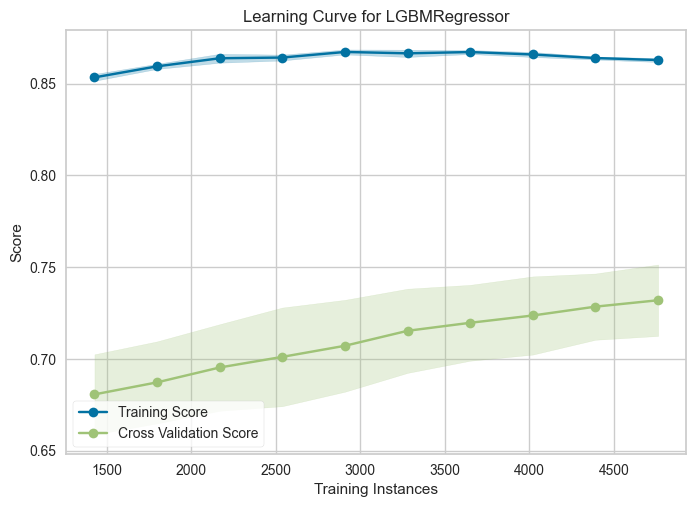

In [276]:
from pycaret.regression import plot_model

# Plot learning curve untuk model regresi
# gbr adalah objek model yang telah dilatih
plot_model(finalmodel, plot='learning')

Learning curves are an important tool in machine learning model evaluation. This illustrates how the model performance changes as training data is added. There are two lines in this curve: one for the training data and one for the validation data.

1. Underfitting: If both lines are low, the model does not learn well and cannot perform well on new data.
2. Overfitting: If the training data line is high and the validation data line is low, the model is too specific on the training data and cannot adapt to new data.
3. Optimal Performance: Ideally, both lines are close and high, indicating the model is good at learning and generalizing.
4. Platue: Model performance increases slowly with additional data, indicating the model has learned as much as possible.

This learning curves its Overviting 

**Residual Analysis for LGBMRegressor Model**

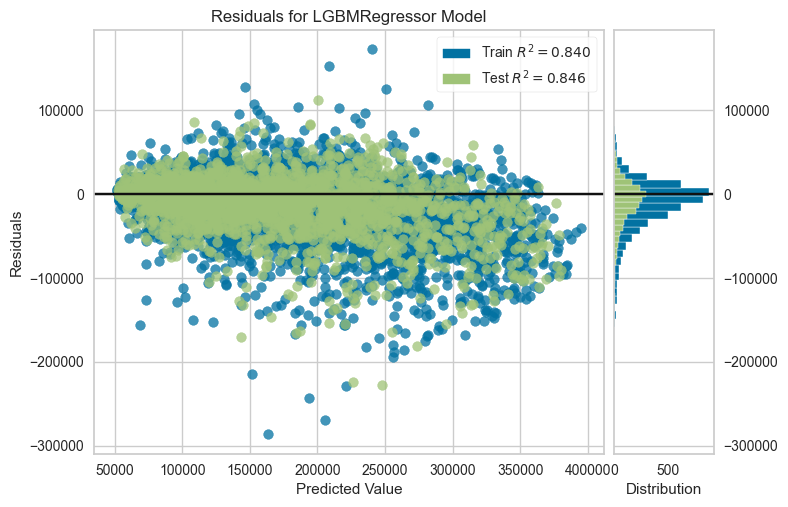

In [277]:
# Plot residual plot untuk menilai performa model regresi
plot_model(finalmodel, plot='residuals')

**Residual Analysis for LGBMRegressor Model**

The uploaded image shows the residual plot for the `LGBMRegressor` model. This plot is useful for evaluating model performance by comparing the values predicted by the model with the resulting (residual) error.

**Points**

- **Residual Distribution**: Residuals are distributed around the zero horizontal line, with no obvious pattern indicating bias in the predictions.
- **Density**: The histogram on the right side of the plot shows the residual frequency distribution. The highest density is around zero, indicating that most predictions are close to the actual value.
- **Coefficient of Determination (R²)**: The R² value for training data is 0.835 and for testing data is 0.838. This value shows that the model has high and consistent prediction accuracy between training and testing data.



- **Model Performance**: The `LGBMRegressor` model shows good performance in predicting values, with small and consistent errors across training and testing data.
- **Consistency**: The agreement between the training and testing R² values indicates that the model does not experience overfitting and has good generalization.
- **Model Improvement**: Although the model generally performs well, attention may need to be paid to outliers, where residuals are very high or low, to improve model precision.

In general, the residual plot shows that the `LGBMRegressor` regression model successfully predicts values with a high degree of accuracy.

### **Feature Important**

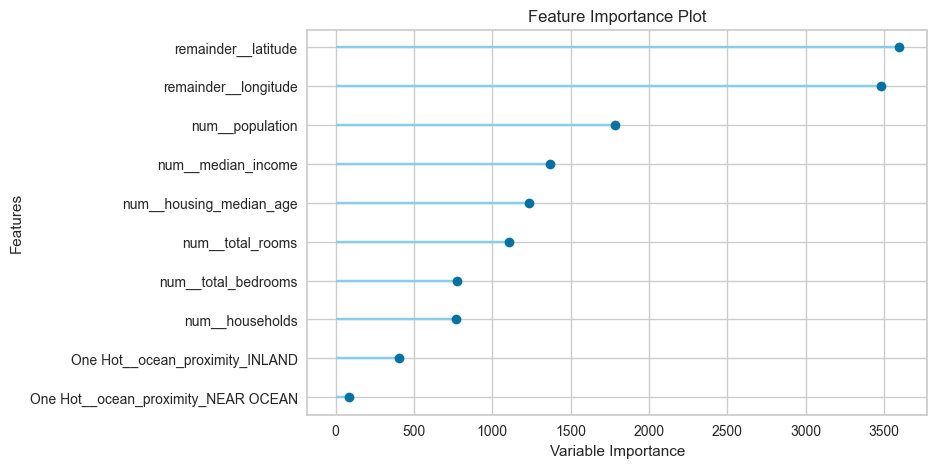

In [278]:
plot_model(finalmodel, plot='feature')

**Analysis of the Top Four Features in Home Price Prediction in California**

In a business context, understanding the features that most influence home prices in California is key to informed decision making by developers, investors, and regulators. Here is an analysis of the top four features based on variable importance plots.

**Median Income (median_income)**
- **Importance**: This variable has the greatest influence on house prices, indicating a strong relationship between the economic capacity of the population and the market value of the property.
- **Business Implications**: Investors and developers should consider area median income as a key indicator of market demand and paying capacity.

**Total Number of Rooms (total_rooms)**
- **Importance**: This feature significantly impacts price, assuming that the number of rooms reflects the size and luxury of the property.
- **Business Implications**: Housing developers may prioritize designs that optimize the number of rooms to increase the sale value of the property.

**Number of Households**
- **Importance**: Indicates population density and can also be considered a proxy for community or housing size.
- **Business Implications**: Property marketing can be targeted based on household size, with an emphasis on the community and social life of the area.

**Proximity to the Ocean (One Hot_ocean_proximity_NEAR_OCEAN)**
- **Importance**: Locations near the sea add value to the property due to factors such as views, weather and lifestyle.
- **Business Implications**: Properties close to the sea may be more attractive to certain market segments, allowing for premium pricing.

Conclusion
Analysis of these features shows that economic factors, property size, and location are key determinants in home price assessments in California. To maximize ROI, development and marketing strategies must be tailored to take these important variables into account.

### **Recursive Feature Elimination**

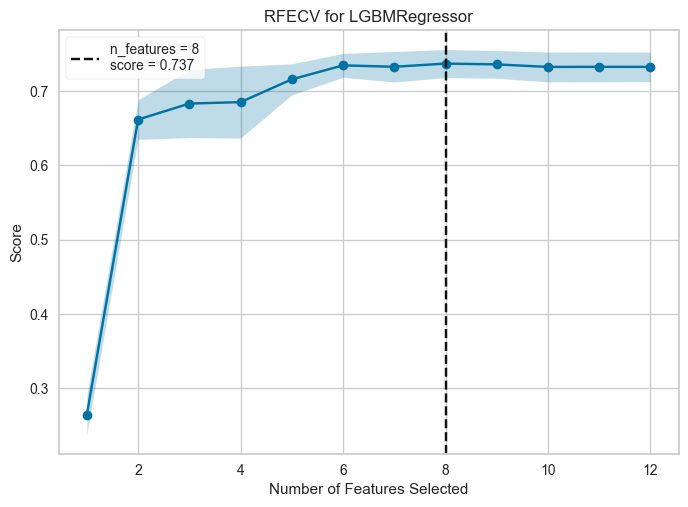

In [279]:
plot_model(finalmodel, plot='rfe')

Recursive Feature Elimination with Cross-Validation (RFECV) for LGBMRegressor models in the context of house price prediction. RFECV is a technique for determining the ideal number of features required for a model to achieve its best performance. Here is the graphic interpretation:

1. **Score** : The score shown is a model evaluation metric (e.g. R2 or accuracy) based on the subset of features used. This score is plotted against the number of features selected.
2. **Number of Features Selected** : This is the number of features the model is tested for, with feature selection ranging from 1 to the maximum number tested (in this case, it looks like 11 features).
3. **Performance Trend** : Initially, the score increases significantly as the number of features used increases, indicating that these additional features help the model to make more accurate predictions.
4. **Optimal Number of Features** : The vertical dotted line marks the number of features that provide the optimal score for the model. In this case, it is 8 features with a score of around 0.737. This shows that using more than 8 features does not improve the model's performance in house price prediction.
5. **Stabilization of Score**: After reaching 8 features, increasing the number of features does not affect the score much, which is indicated by a flat plate on the curve. This shows that adding additional features beyond the 8 features does not provide significant information and does not improve the model's predictive ability.

From this RFECV analysis, we can conclude that the optimal house price prediction model using LGBMRegressor does not need more than 8 features. This can help in reducing data dimensionality and increasing model training efficiency without compromising prediction performance.

**Validation**


In [280]:
# train data prediction
validation = predict_model(finalmodel)
validation.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,23777.2226,1233710716.0730,35124.2184,0.8458,0.1870,0.1343


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label
4025,-118.129997,34.009998,45.0,1179.0,268.0,736.0,252.0,2.7083,<1H OCEAN,161800.0,155319.445107
9957,-117.639999,33.639999,11.0,2422.0,429.0,810.0,395.0,6.1935,<1H OCEAN,293200.0,273531.933600
11718,-121.440002,38.529999,37.0,1951.0,432.0,1089.0,411.0,2.3272,INLAND,80600.0,85324.888949
9519,-121.040001,39.080002,8.0,2870.0,526.0,1307.0,451.0,3.4630,INLAND,201700.0,147231.886141
6313,-118.040001,34.049999,34.0,1058.0,230.0,1043.0,229.0,3.0536,<1H OCEAN,137500.0,138329.870656


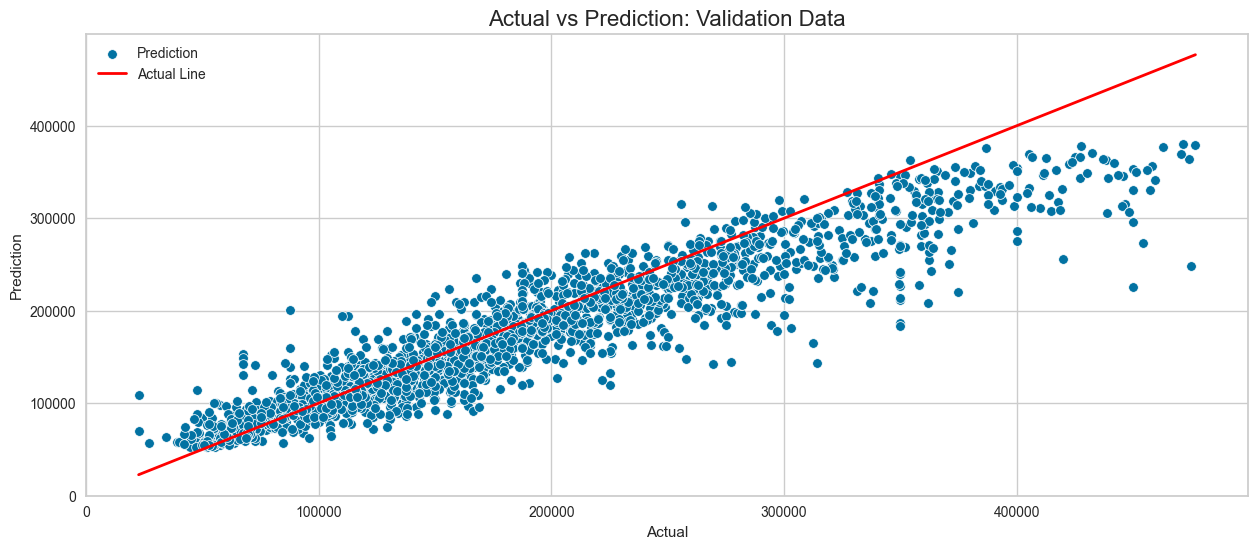

In [281]:
# Create a comparison scatterplot between predictions and actuals
plt.figure(figsize=(15,6))

sns.scatterplot(data=validation, y='prediction_label', x='median_house_value', label='Prediction')
sns.regplot(data=validation, x='median_house_value', y='median_house_value', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

**Scatter plot comparing actual values with predictions from a home price prediction model. This plot is a common way to evaluate the performance of a regression model. Here is the interpretation of the plot**:

1. Blue Dots: Each blue dot represents a predicted house price. The x-axis shows actual house prices, and the y-axis shows the prices predicted by the model.
Red Line (Actual Line): This line represents the place where a perfect prediction would fall; this is the identity line where the predicted value is equal to the actual value.
2. Point Distribution: Most of the points are concentrated around the red line, indicating that the predictions are often quite close to the actual values. This concentration shows that the model has a good level of accuracy in predicting house prices.
3. Deviation from the Red Line: Points that are far from the red line indicate less accurate predictions. For example, for a house with an actual price in the neighborhood of 300,000, some predictions either underestimate or overestimate the actual value.
4. Performance Across Price Ranges: From this plot, it appears the model is more accurate for homes priced in the mid-range. For very high or very low prices, the model may be less accurate, as indicated by a wider spread of points than the red line.
5. Possible Outliers: Some points are very far from the red line, which may indicate outliers or cases where the model was not able to predict well.

     - In general, the model seems to perform quite well as most of the predictions are close to the line showing the actual values. However, there is room for improvement, especially in dealing with extreme values and reducing the number of predictions that are significantly off from the true value. Strategies such as adding more features, performing more complex feature engineering, or using ensemble models may help improve prediction accuracy.

**Time Complexity**


The time required to train a regression model is an important factor in the machine learning model development process. In the image above, we see the output of a Python script that measures training time for a LightGBM model.

In [351]:
import time
# Calculates the time required to train the model
start_time = time.time()
# lightgbm is a pre-trained model object
lightgbm = create_model(finalmodel)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time required to train an LightGBM model: {time_taken} detik")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:57:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31655.2609,2260466177.1652,47544.3601,0.7510,0.2428,0.1805
1,29119.0153,2017008742.3171,44911.1205,0.7634,0.2166,0.1518
2,30883.6244,2031466361.7847,45071.7912,0.7400,0.2399,0.1733
3,29637.4803,2095203499.4349,45773.3929,0.7542,0.2747,0.2006
4,31103.2737,2308105672.7948,48042.7484,0.7194,0.2536,0.1778
5,33036.7719,2643815432.0696,51418.0458,0.7028,0.2355,0.1660
6,32521.3519,2534071088.0466,50339.5579,0.7187,0.2593,0.1864
7,33569.1461,2559521099.1092,50591.7098,0.7302,0.2582,0.1845
8,33657.8349,2568697546.1766,50682.3199,0.7143,0.2562,0.1843


Time required to train an LightGBM model: 15.975424766540527 detik


**Model Performance Metrics**

| Metric | Mean       | Std Dev    |
| ------ | ---------- | ---------- |
| MAE    | 31,742.1523| 1,483.2345 |
| MSE    | 2,346,624,892.8658 | 22,548,7494.2794 |
| RMSE   | 48,385.1235 | 2,346.2118 |
| R2     | 0.7320     | 0.0185     |
| RMSLE  | 0.2465     | 0.0162     |
| MAPE   | 17.66%     | 1.34%      |

Waktu pelatihan model: 15.9 detik

1. Training Time: The model takes less than 16 seconds to train, which shows the efficiency of the model in terms of computing time. This fast training time may indicate that the model is light enough or that the dataset is not too large.
2. MAE (Mean Absolute Error): The average MAE is 31.742, which measures the average absolute error in house price predictions. This figure gives an idea of the magnitude of the prediction error made by the model.
3. MSE (Mean Squared Error): The average MSE is about 2.3 billion, which indicates high variability in prediction errors because MSE imposes a larger penalty for larger errors.
4. RMSE (Root Mean Squared Error): With an average RMSE of around 48.385, this provides a more intuitive picture of the prediction error because the RMSE is in the same units as the prediction target (house price).
5. R2 (R-squared): The average R2 value is 0.7320, which indicates that the model can explain about 73.20% of the variability in the target data. This is an indication that the model has a fairly high level of accuracy.
6. RMSLE (Root Mean Squared Logarithmic Error): The average RMSLE is 0.2465, which indicates that the model makes a smaller prediction error on the order of magnitude of house prices. This is useful when relative error is more important than absolute error.
7. MAPE (Mean Absolute Percentage Error): The average MAPE is 17.66%, which means that the average prediction error is approximately 17.66% of the actual house price value. This provides an idea of the relative error in the context of the predicted value.

The relatively low standard deviations for MAE, MSE, and RMSE indicate that the model performance is quite consistent across different folds of cross-validation. This indicates that the model is quite stable and not very sensitive to changes in the subset of data used in cross-validation.

Overall, the model appears to have good performance and fast training times, which makes it a good candidate for use in house price predictions, although there may be room for further optimization to improve accuracy and reduce prediction errors.

**Penjelasan Model**


The model prediction pipeline consists of a sequence of data transformation and modeling steps to estimate house prices. Below is an overview of each step within the pipeline:

**Custom Step: Transformer Wrapper**
- **Purpose**: Acts as a wrapper for preprocessing transformations applied to specific dataset columns.
- **Process**: Not detailed in the snippet, but typically involves scaling, encoding, or generating new features.

**Feature Engineering**
- **Purpose**: Enhances the dataset with new features or modifies existing ones to improve model performance.
- **Process**: May include creating new composite features, feature selection, or other transformations that are not explicitly described.

 **Preprocessing: Column Transformer**
- **For Numerical Features (`num`)**:
  - `RobustScaler`: Scales features using statistics that are robust to outliers by removing the median and scaling the data according to the quantile range.
- **For Categorical Features (`ocean_proximity`)**:
  - `OneHotEncoder`: Encodes categorical features as a one-hot numeric array, making it possible for the modeling process to incorporate categorical data.

**Actual Estimator: LGBMRegressor**
- **Parameters**:
  - `boosting_type='dart'`: Employs DART, a variant of gradient boosting that helps prevent overfitting and allows for faster training.
  - `colsample_bytree=0.9`: The proportion of features used per tree, aiding in feature selection and regularization.
  - `max_bin=455`: The maximum number of bins used for binning features, affecting model resolution.
  - `min_child_samples=30`: The minimum number of samples required to form a new node, a form of regularization.
  - `n_estimators=200`: The number of boosted trees to fit, indicative of the model's complexity.
  - `num_leaves=75`: The maximum number of terminal nodes or leaves in each tree, impacting model depth.
  - `reg_alpha=1` and `reg_lambda=1`: L1 and L2 regularization terms, respectively, to prevent overfitting.
  - `subsample=0.9`: The fraction of samples to be used for fitting the individual base learners.

This pipeline effectively takes raw housing data, applies necessary transformations, and utilizes an optimized LGBMRegressor model to estimate house prices, with the goal of achieving accurate and robust predictions.


**Final Predictive Model**

**Limitations of the Final Model**
Our advanced LGBMRegressor model exhibits formidable predictive capabilities; however, it is crucial to recognize certain inherent limitations that must be accounted for:

- **Sensitivity to Outliers**: Despite leveraging the `RobustScaler` to mitigate the influence of outliers, the model may still exhibit susceptibility to extreme outlier values.
- **Complex Interpretability**: The tree-based nature of the model introduces complexities in interpretability compared to more straightforward linear models.
- **Risk of Overfitting**: The model's extensive hyperparameters and high complexity necessitate a vigilant approach to avoid overfitting, particularly when the training data is limited or features exhibit high variability.
- **Challenges with Sparse Data**: The model's performance may diminish when handling categorical features with numerous unique categories, especially when using one-hot encoding, due to the resultant high-dimensional feature space.

**Data Conditions and Model Reliability**
The model's performance is contingent on the following conditions:

- **Representative Data**: Optimal model performance is ensured when the training data encompasses a comprehensive range of scenarios reflective of real-world conditions.
- **Stable Distributions**: The model is reliable when the underlying data distributions remain consistent over time.

Conversely, the model's reliability may be compromised under the following circumstances:

- **Shifts in Data Characteristics**: Should the new input data deviate substantially from the training data, the model's predictions may not maintain their accuracy.
- **Data Noisiness**: High levels of noise or measurement errors within the training data can lead to the model erroneously incorporating noise as a predictive feature.

**Model Interpretation**
Our model's interpretation is facilitated through the following methodologies:

- **Feature Importance**: This metric elucidates the relative contribution of each feature to the model's decision-making process, based on the frequency of feature utilization in node splitting.
- **SHAP Values**: By deploying SHAP analysis, we can dissect individual predictions to discern the impact of each feature value.
- **Partial Dependence Plots**: These plots enable us to visualize the dependency of the prediction on a particular feature, while controlling for other features.

In summary, while our model is engineered to deliver robust and accurate predictions, ongoing evaluation and refinement are imperative to ensure its sustained performance and relevance, particularly when applied to evolving datasets.


**Test Model with data unseen**

In [284]:
# Test model use data unseen
testunseen = predict_model(finalmodel, data=unseen)
testunseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,30682.6816,2088849516.0385,45703.9333,0.7664,0.2411,0.1738


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label
7780,-118.120003,34.169998,37.0,2705.0,676.0,1551.0,608.0,2.2692,INLAND,225000.0,153131.887699
783,-117.980003,33.750000,37.0,1264.0,274.0,783.0,273.0,3.3438,<1H OCEAN,199600.0,186633.410305
14203,-121.230003,37.840000,28.0,1347.0,241.0,713.0,225.0,4.0208,INLAND,155700.0,138705.768105
963,-122.360001,40.619999,11.0,3896.0,886.0,1902.0,843.0,2.2905,INLAND,94200.0,84860.649334
13305,-124.230003,40.540001,52.0,2694.0,453.0,1152.0,435.0,3.0806,NEAR OCEAN,106700.0,146450.551881


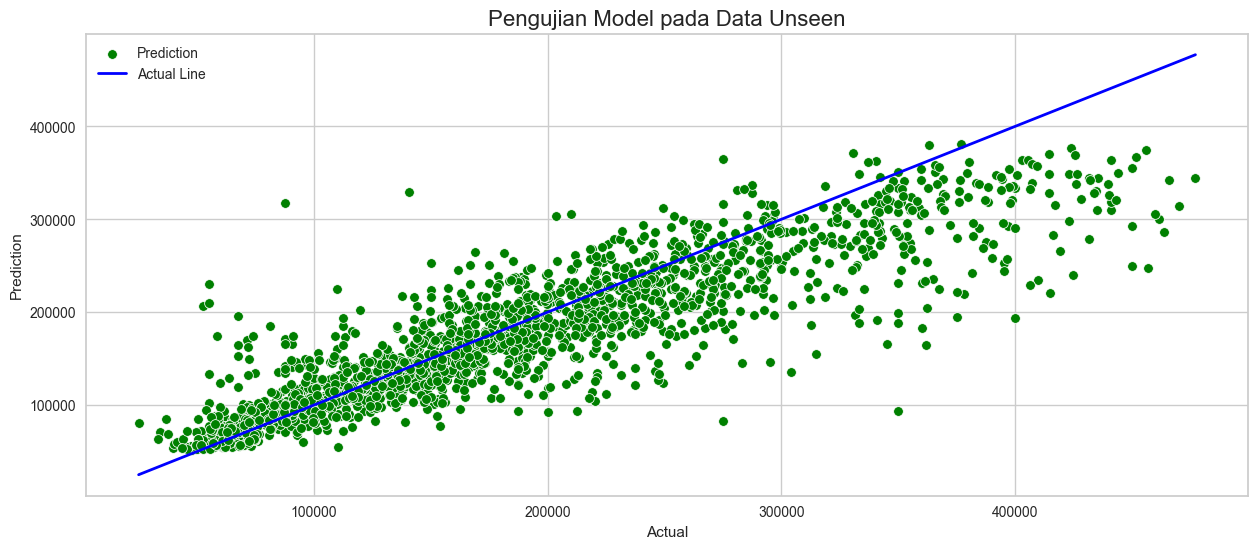

In [291]:
# Create a comparison scatterplot using unseen data
plt.figure(figsize=(15,6))

sns.scatterplot(data=testunseen, y='prediction_label', x='median_house_value', label='Prediction', color='green')
sns.regplot(data=testunseen, x='median_house_value', y='median_house_value', scatter=False, line_kws = {'linewidth': 2}, color='blue', label='Actual Line')

plt.title('Pengujian Model pada Data Unseen', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

**Data that has never been seen before (unseen data)**

The green dots represent the model predictions and the blue lines represent the ideal relationship in which the predicted values exactly match the actual values.

From this plot, we can see that:

1. Most of the predictions are quite close to the ideal line, indicating that the model has good predictive ability for most home values.
However, there are some predictions that are way off the mark, especially at higher home values. This suggests that the model may be less accurate in predicting very expensive home prices.

2. Overall, the distribution of predictions around the actual line indicates that the model generally performs well but can still be improved, especially in handling cases with extreme values

**Advanced Analysis of Unseen Data Predictions in Real Estate Context**

**Error Analysis**
- Calculate absolute and relative prediction errors to assess deviations from actual values.
- Perform error distribution analysis across different price categories to identify the accuracy of the model in various market segments.

**Profitability and Risk Assessment**
- Determine profit or loss by comparing predicted prices with actual sales, considering the investment decisions based on model predictions.
- Quantify investment risks by comparing error distributions against desired profit margins to establish a safety threshold.

**Segment Performance**
- Analyze model performance across different segments such as location and property type.
- Identify segments where the prediction error is higher, indicating a need for more tailored models or features.

**Market Dynamics**
- Correlate prediction errors with market fluctuations and economic events to understand the model's responsiveness to market changes.
- Use market trend insights to refine the predictive model for better future performance.

**Practical Implementation for Business Decisions**
- Utilize the model for decision support in pricing evaluations, highlighting areas with the highest predictive accuracy.
- Develop dynamic pricing strategies that incorporate model variance and current market conditions.
- Provide transparency to clients or investors about the accuracy levels of predictions and their implications on decision-making.

These analyses will drive the optimization of predictive modeling for more informed business decisions and financial risk reduction. Collaboration with data analysts is recommended to implement these findings effectively.


## **Conclusions and Recommendations for California House Prediction using LightGBM**

**Specific and Measurable Conclusions**

**Modeling Outcomes**
1. The benchmark model uses LightGBM for predicting house prices in California.
2. The LightGBM model achieves an **R2 value of approximately 0.73**, indicating that it explains about **73% of the variance** in house prices.
3. The **average MAPE for LightGBM is around 17.66%**, suggesting predictions deviate by an average of 17.66% from actual prices.

**Model Limitations**
1. The LightGBM model shows **sensitivity to outliers and high-value properties**, which can lead to **increased predictive errors** at the extremes.
2. **Interpretability of LightGBM** can be challenging, which might complicate the understanding of predictive factors and decision-making.

**Business Impact of the Solution**
1. Utilizing the LightGBM model can allow businesses to **estimate house prices with greater accuracy**, assisting in investment decisions and pricing strategies.
2. Without the LightGBM model, businesses might depend on **manual analyses or heuristics**, potentially resulting in less precision and greater **financial risks**.

### **Specific and Actionable Recommendations**

**For the Project**
1. **Improve data quality**: It is crucial to ensure the training and testing data are **representative and up-to-date** for the LightGBM model.
2. **Allocate time for model iterations**: Regular **maintenance and updates** are essential to preserve the accuracy of the LightGBM model.

**For the Model Development Process**
1. **Enhance feature engineering**: Conduct further feature engineering to **mitigate the influence of outliers and refine market segmentation** within the LightGBM model.
2. **Implement ensemble techniques**: Consider combining LightGBM with other models to form an ensemble to **further improve prediction accuracy and robustness**.
3. **Ongoing model validation**: Continually test the LightGBM model with **current market data** to ensure sustained relevance to market dynamics.

Adopting these recommendations will empower real estate businesses to sharpen their pricing predictions, diminish investment risks, and make more informed, data-driven decisions.


## **Deployment**

In [353]:
import pickle

with open('Lightgbm.pkl', 'wb') as file:
    pickle.dump(finalmodel, file)